# Global Power Plant Database

**Project Description**

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:
	
- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification 
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
-  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

**Fuel Type Aggregation**

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('database_IND.csv')
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

- The dataset has both categorical and numerical dataset

In [3]:
df.shape

(907, 27)

- The dataset has 907 rows and 15 columns

In [4]:
df['primary_fuel'].value_counts()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

- Coal and Hydro account for the highest number of power plants, with 258 and 251 instances, respectively.
- Renewable energy sources such as Solar and Wind collectively contribute a substantial number, with 127 and 123 power plants, showcasing a notable emphasis on clean energy.
- Nuclear and Oil-based power plants have relatively lower representation, with only 9 and 20 instances, respectively, reflecting a smaller share in the dataset.

In [5]:
df['capacity_mw'].value_counts()

capacity_mw
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: count, Length: 361, dtype: int64

- The dataset exhibits a variety of power plant capacities, ranging from smaller capacities like 5.0 MW (megawatts) and 10.0 MW to larger capacities such as 600.0 MW and 1200.0 MW.


- A notable number of power plants have a capacity of 5.0 MW, with 39 instances, suggesting a common capacity size within the dataset.

- Specific capacity values, such as 291.0 MW, 645.0 MW, 41.4 MW, 17.5 MW, and 106.6 MW, occur less frequently in the dataset, indicating a diverse but potentially specialized distribution of power plant capacities.

### Exploratory Data Analysis

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df.columns.to_list()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

-  We notice the different variables present in dataset in the list form

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

- dtypes: float64(15), object(12) memory usage: 191.4+ KB

In [9]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

- The dtype: float64(15), object(12) 

In [10]:
# Lets check the value counts for each column

for i in df.columns:
    print(df[i].value_counts())
    print('\n')

country
IND    907
Name: count, dtype: int64


country_long
India    907
Name: count, dtype: int64


name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: count, Length: 907, dtype: int64


gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: count, Length: 907, dtype: int64


capacity_mw
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: count, Length: 361, dtype: int64


latitude
19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    

- The value_counts function provides an insightful summary of unique occurrences within a dataset.
- It enumerates the frequency of each unique value, aiding in the identification of predominant categories and highlighting the distribution of data

In [11]:
blank_spaces = [column for column in df.columns if df[column].dtype == 'object' and df[column].str.strip().str.len().any()]

if blank_spaces:
    print("Columns with leading or trailing spaces:")
    print(blank_spaces)
else:
    print(" No columns have leading or trailing spaces:")
    
    
# Remove leading and trailing spaces from identified columns
for column in blank_spaces:
    df[column] = df[column].str.strip() 

# Confirm that there are no more leading or trailing spaces
has_spaces_after_cleaning = df.applymap(lambda x: isinstance(x, str) and x.strip() != x).any().any()

if has_spaces_after_cleaning:
    print("DataFrame still has leading or trailing spaces.")
else:
    print('\n')
    print("* Test data does not have leading or trailing spaces after cleaning.")

Columns with leading or trailing spaces:
['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']


* Test data does not have leading or trailing spaces after cleaning.


In [12]:
df.duplicated().sum()

0

- The dataset has no duplicated entries, indicating a clean and unique representation of each observation. 

In [13]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

The dataset contains null values, signifying instances where data is missing or undefined.

In [14]:
df.isnull().sum().sum()

10445

- The dataset contains 10,445 null values, signifying instances where data is missing or undefined.

<Axes: >

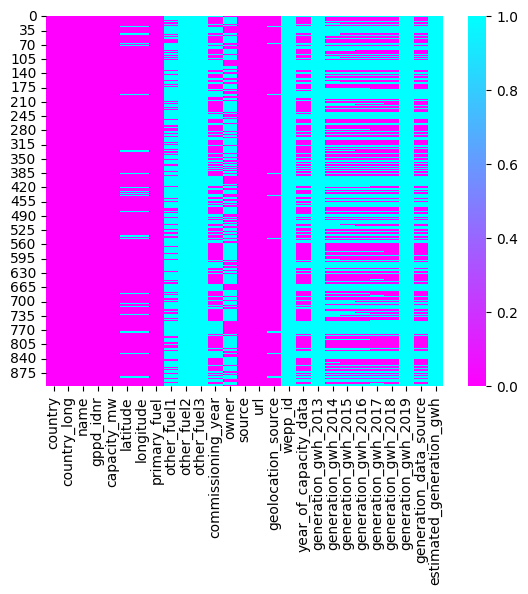

In [15]:
# Lets check for null values again
sns.heatmap(df.isnull(), cmap = 'cool_r')

- We plot to see the missing values through heat map and it indicates null values

In [16]:
df.drop(columns = ['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

- Removed few columns to streamline the dataset and focus on relevant features for subsequent analyses. 

In [17]:
df.shape

(907, 20)

- The new shape of dataset has 907 rows and 20 columns

In [18]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

- still our dataset contains null values

In [19]:
df.drop(columns = ['country','owner','url','generation_data_source','year_of_capacity_data'],axis=1,inplace=True)

- Removed few columns to streamline the dataset and focus on relevant features for subsequent analyses.

In [20]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2018'].median())
df['latitude'] = df['latitude'].fillna(df['latitude'].median())
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].median())

- Missing values in the geolocation_source column have been filled with the most frequent value, and for the generation_gwh column, missing values were imputed using the median, which represents the central value of the available data. 

In [21]:
df.isnull().sum()

country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

- No more missing values in the dataset

In [22]:
df.shape

(907, 15)

- The new shape of dataset has 907 rows and 15 columns

In [23]:
df.columns.to_list()

['country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'commissioning_year',
 'source',
 'geolocation_source',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

- the columns remained after removal of null values

In [24]:
df.dtypes

country_long            object
name                    object
gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

- We have two types of datatypes float and object

In [25]:
df['commissioning_year'] = df['commissioning_year'].astype(int)

- Converting year into int datatype

In [26]:
df.dtypes

country_long            object
name                    object
gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year       int32
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [27]:
# Checking for Categorical column
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print('\n')

# Check for numerical column:
numerical_col = []
for i in df.dtypes.index:
    if df[i].dtypes !='object':
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)
        

Categorical Columns:  ['country_long', 'name', 'gppd_idnr', 'primary_fuel', 'source', 'geolocation_source']


Numerical Columns:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [28]:
# Checking number of unique values in each column
df.nunique().to_frame('No: of unique values')

No: of unique values
country_long                            1
name                                  907
gppd_idnr                             907
capacity_mw                           361
latitude                              836
longitude                             827
primary_fuel                            8
commissioning_year                     73
source                                191
geolocation_source                      3
generation_gwh_2014                   372
generation_gwh_2015                   397
generation_gwh_2016                   404
generation_gwh_2017                   409
generation_gwh_2018                   409

- The number of unique values for each column in the DataFrame has been summarized which provides a quick overview of the distinct elements within each column, aiding in the understanding of data variability and uniqueness.

In [29]:
df1=df.copy()

- Created a new dataframe from the existing df

In [30]:
df1.drop(['commissioning_year'],axis=1,inplace=True)

- A new DataFrame named df1 has been created as a copy of the original DataFrame df1 in which commissioning_year column has been dropped as i dont year to be in statistical analysis

In [31]:
df1.describe()

capacity_mw    latitude   longitude  generation_gwh_2014  \
count   907.000000  907.000000  907.000000           907.000000   
mean    326.223755   21.227439   77.427103          1516.689956   
std     590.085456    6.080491    4.815073          2785.604307   
min       0.000000    8.168900   68.644700             0.000000   
25%      16.725000   17.072000   74.388900           801.123775   
50%      59.200000   21.780000   76.719500           801.123775   
75%     385.250000   25.176450   79.206100           801.123775   
max    4760.000000   34.649000   95.408000         28127.000000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count           907.000000           907.000000           907.000000   
mean           1510.071296          1565.361383          1657.121797   
std            2984.994556          3005.087210          3046.862910   
min               0.000000             0.000000             0.000000   
25%             711.181225           737.205450           817.977250   
50%             711.181225           737.205450           817.977250   
75%             711.181225           737.205450           817.977250   
max           30539.000000         30015.000000         35116.000000   

       generation_gwh_2018  
count           907.000000  
mean           1657.121797  
std            3046.862910  
min               0.000000  
25%             817.977250  
50%             817.977250  
75%             817.977250  
max           35116.000000

- The dataset consists of 907 entries for power plants with varying capacities, ranging from 0 to 4760 MW. The average capacity is approximately 326.22 MW, with a notable standard deviation of 590.09 MW, highlighting the diversity in power plant sizes.

- Geographically, the power plants are distributed across latitudes from 8.17 to 34.65 and longitudes from 68.64 to 95.41. The mean latitude is around 21.23, and the mean longitude is approximately 77.43.

- Regarding power generation (GWh) from 2014 to 2018, the dataset exhibits considerable variability. The mean generation values for each year range from 1510.07 to 1657.12 GWh, showcasing the fluctuation in electricity production across these years.

### Data Visualization

##### Univariate Analysis

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

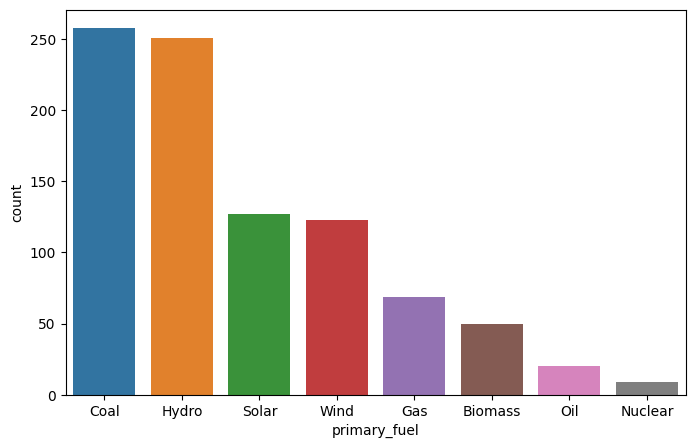

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='primary_fuel', data=df, order = df['primary_fuel'].value_counts().index)
df['primary_fuel'].value_counts()

- Coal is the most prevalent primary fuel, with 258 power plants, indicating a substantial reliance on coal-based energy generation.

- Hydroelectric power follows closely with 251 power plants, showcasing a significant contribution to the energy mix from water-based sources.

- Solar and Wind energy sources are also noteworthy, with 127 and 123 power plants, respectively, emphasizing a growing emphasis on renewable energy.

- Gas, Biomass, and Oil contribute to a moderate extent, with 69, 50, and 20 power plants, respectively.

- Nuclear power has the least representation, with only 9 power plants, reflecting a relatively minor presence in the dataset.

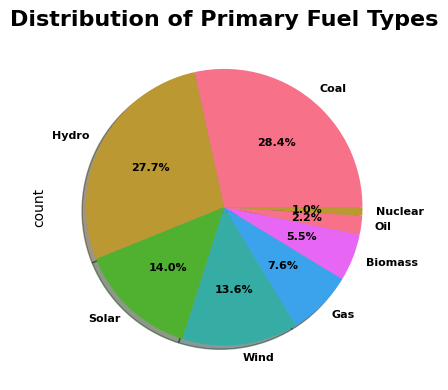

In [33]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')

# Create a pie chart for the distribution of 'primary_fuel'
plt.figure(figsize=(6, 4))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                           textprops={'fontweight': 'bold', 'fontsize': 8}, shadow=True)

plt.title('Distribution of Primary Fuel Types', fontsize=16, fontweight='bold')
plt.show()

- We can determine the percentage for each subgroup within the primary_fuel category

geolocation_source
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: count, dtype: int64

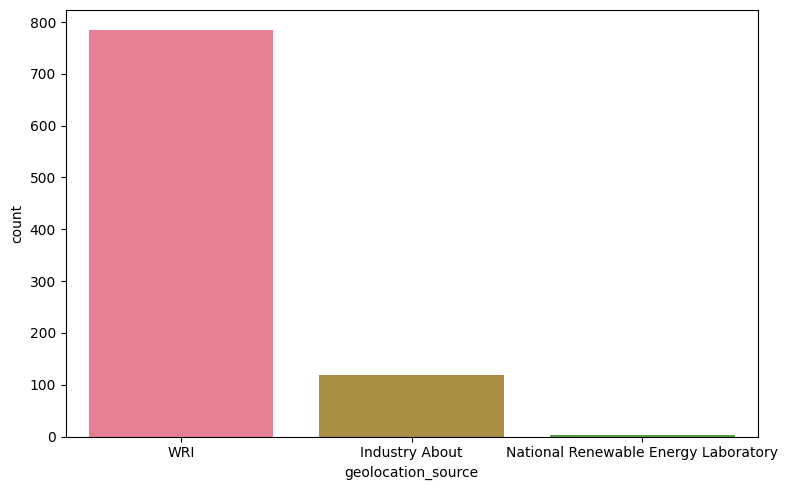

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(x='geolocation_source', data=df, order = df['geolocation_source'].value_counts().index)
df['geolocation_source'].value_counts()

- The majority of power plant geolocation data is sourced from WRI (World Resources Institute), with 784 instances, indicating a widespread utilization of this source for location information.

- Information from "Industry About" contributes to the geolocation data for 119 power plants, offering additional sources beyond WRI.

- The National Renewable Energy Laboratory is a less utilized source, providing geolocation data for 4 power plants in the dataset.

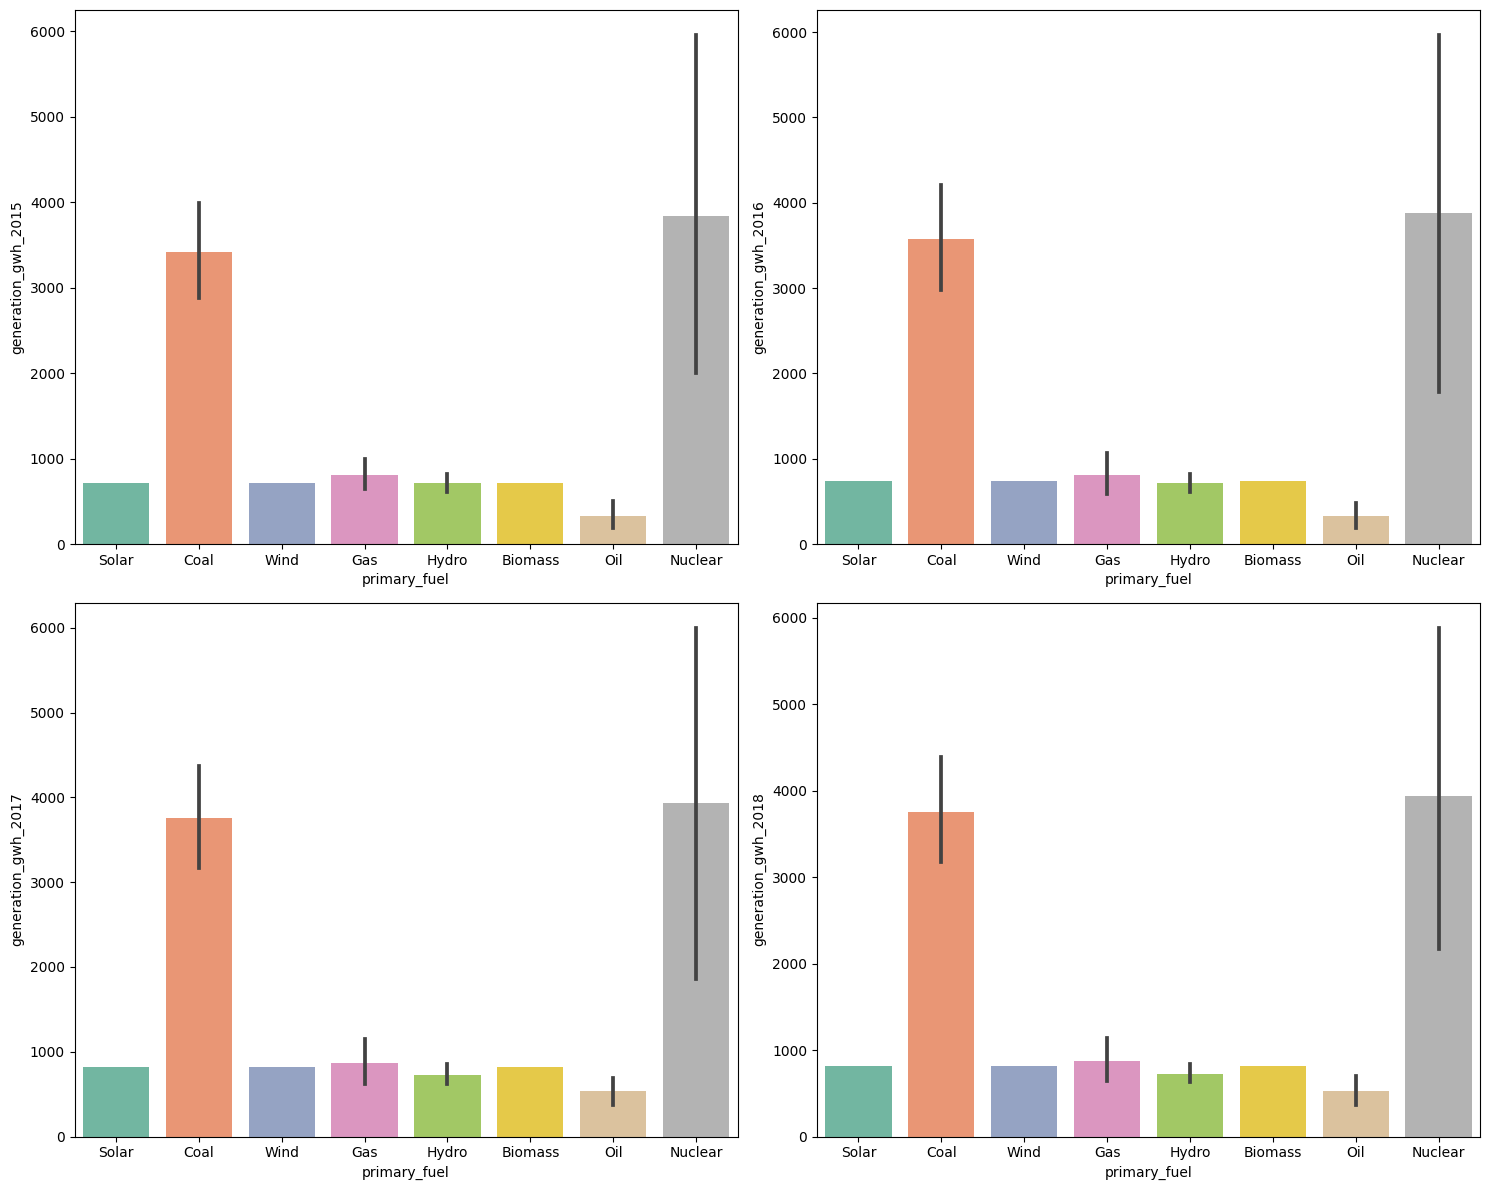

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Loop through years and plot generation growth
for i, year in enumerate(['2015', '2016', '2017', '2018']):
    sns.barplot(x='primary_fuel', y=f'generation_gwh_{year}', ax=axes[i//2, i%2], data=df, palette="Set2")

plt.show()


- From the plot we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal, due to high efficieny of Nuclear powerplants.

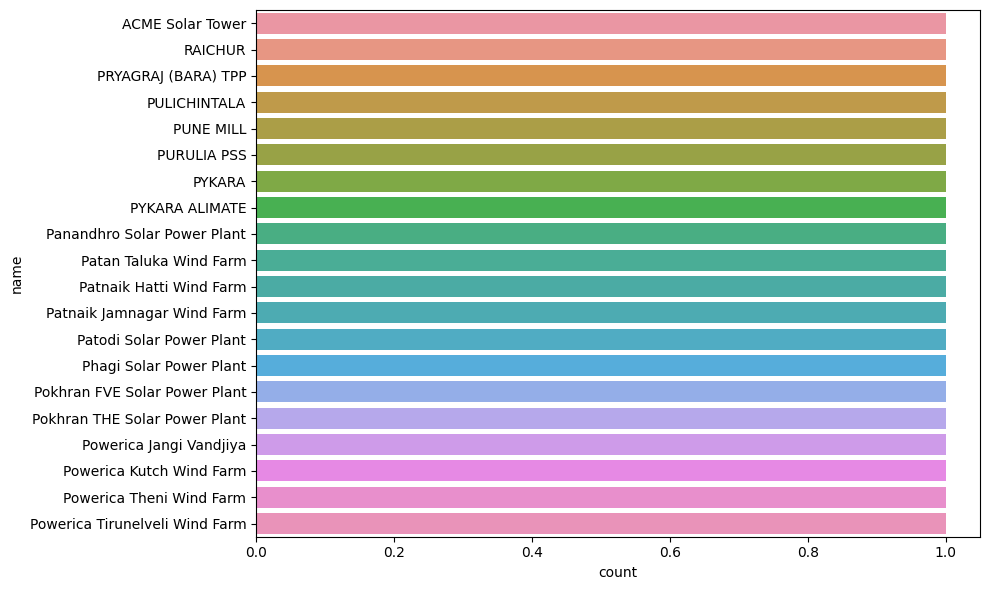

In [36]:
top_n = 20  # top companies to display

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='name', data=df['name'].value_counts().reset_index()[:top_n])
plt.show()


- The bar plot displays the top 20 companies, providing a clear overview of the distribution of power plants among different companies. 
- This visualization aids in identifying the major contributors in power generation in India

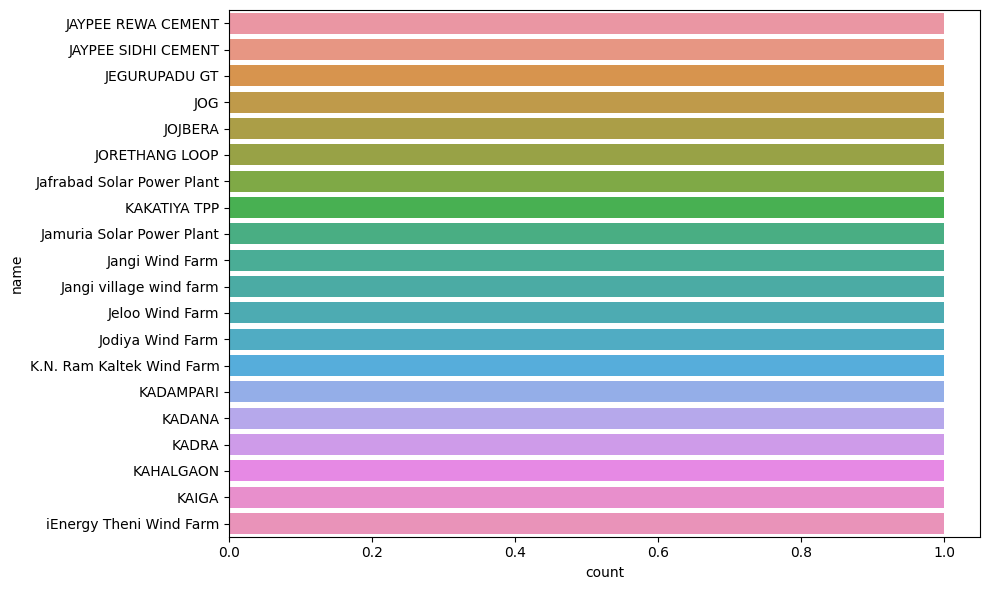

In [37]:
bottom_n = 20     # bottom companies to display

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='name', data=df['name'].value_counts().reset_index()[-bottom_n:])
plt.show()

- The bar plot displays the bottom 20 companies, providing a clear overview of the distribution of power plants among different companies. 
- This visualization aids in identifying the minor contributors in power generation in India

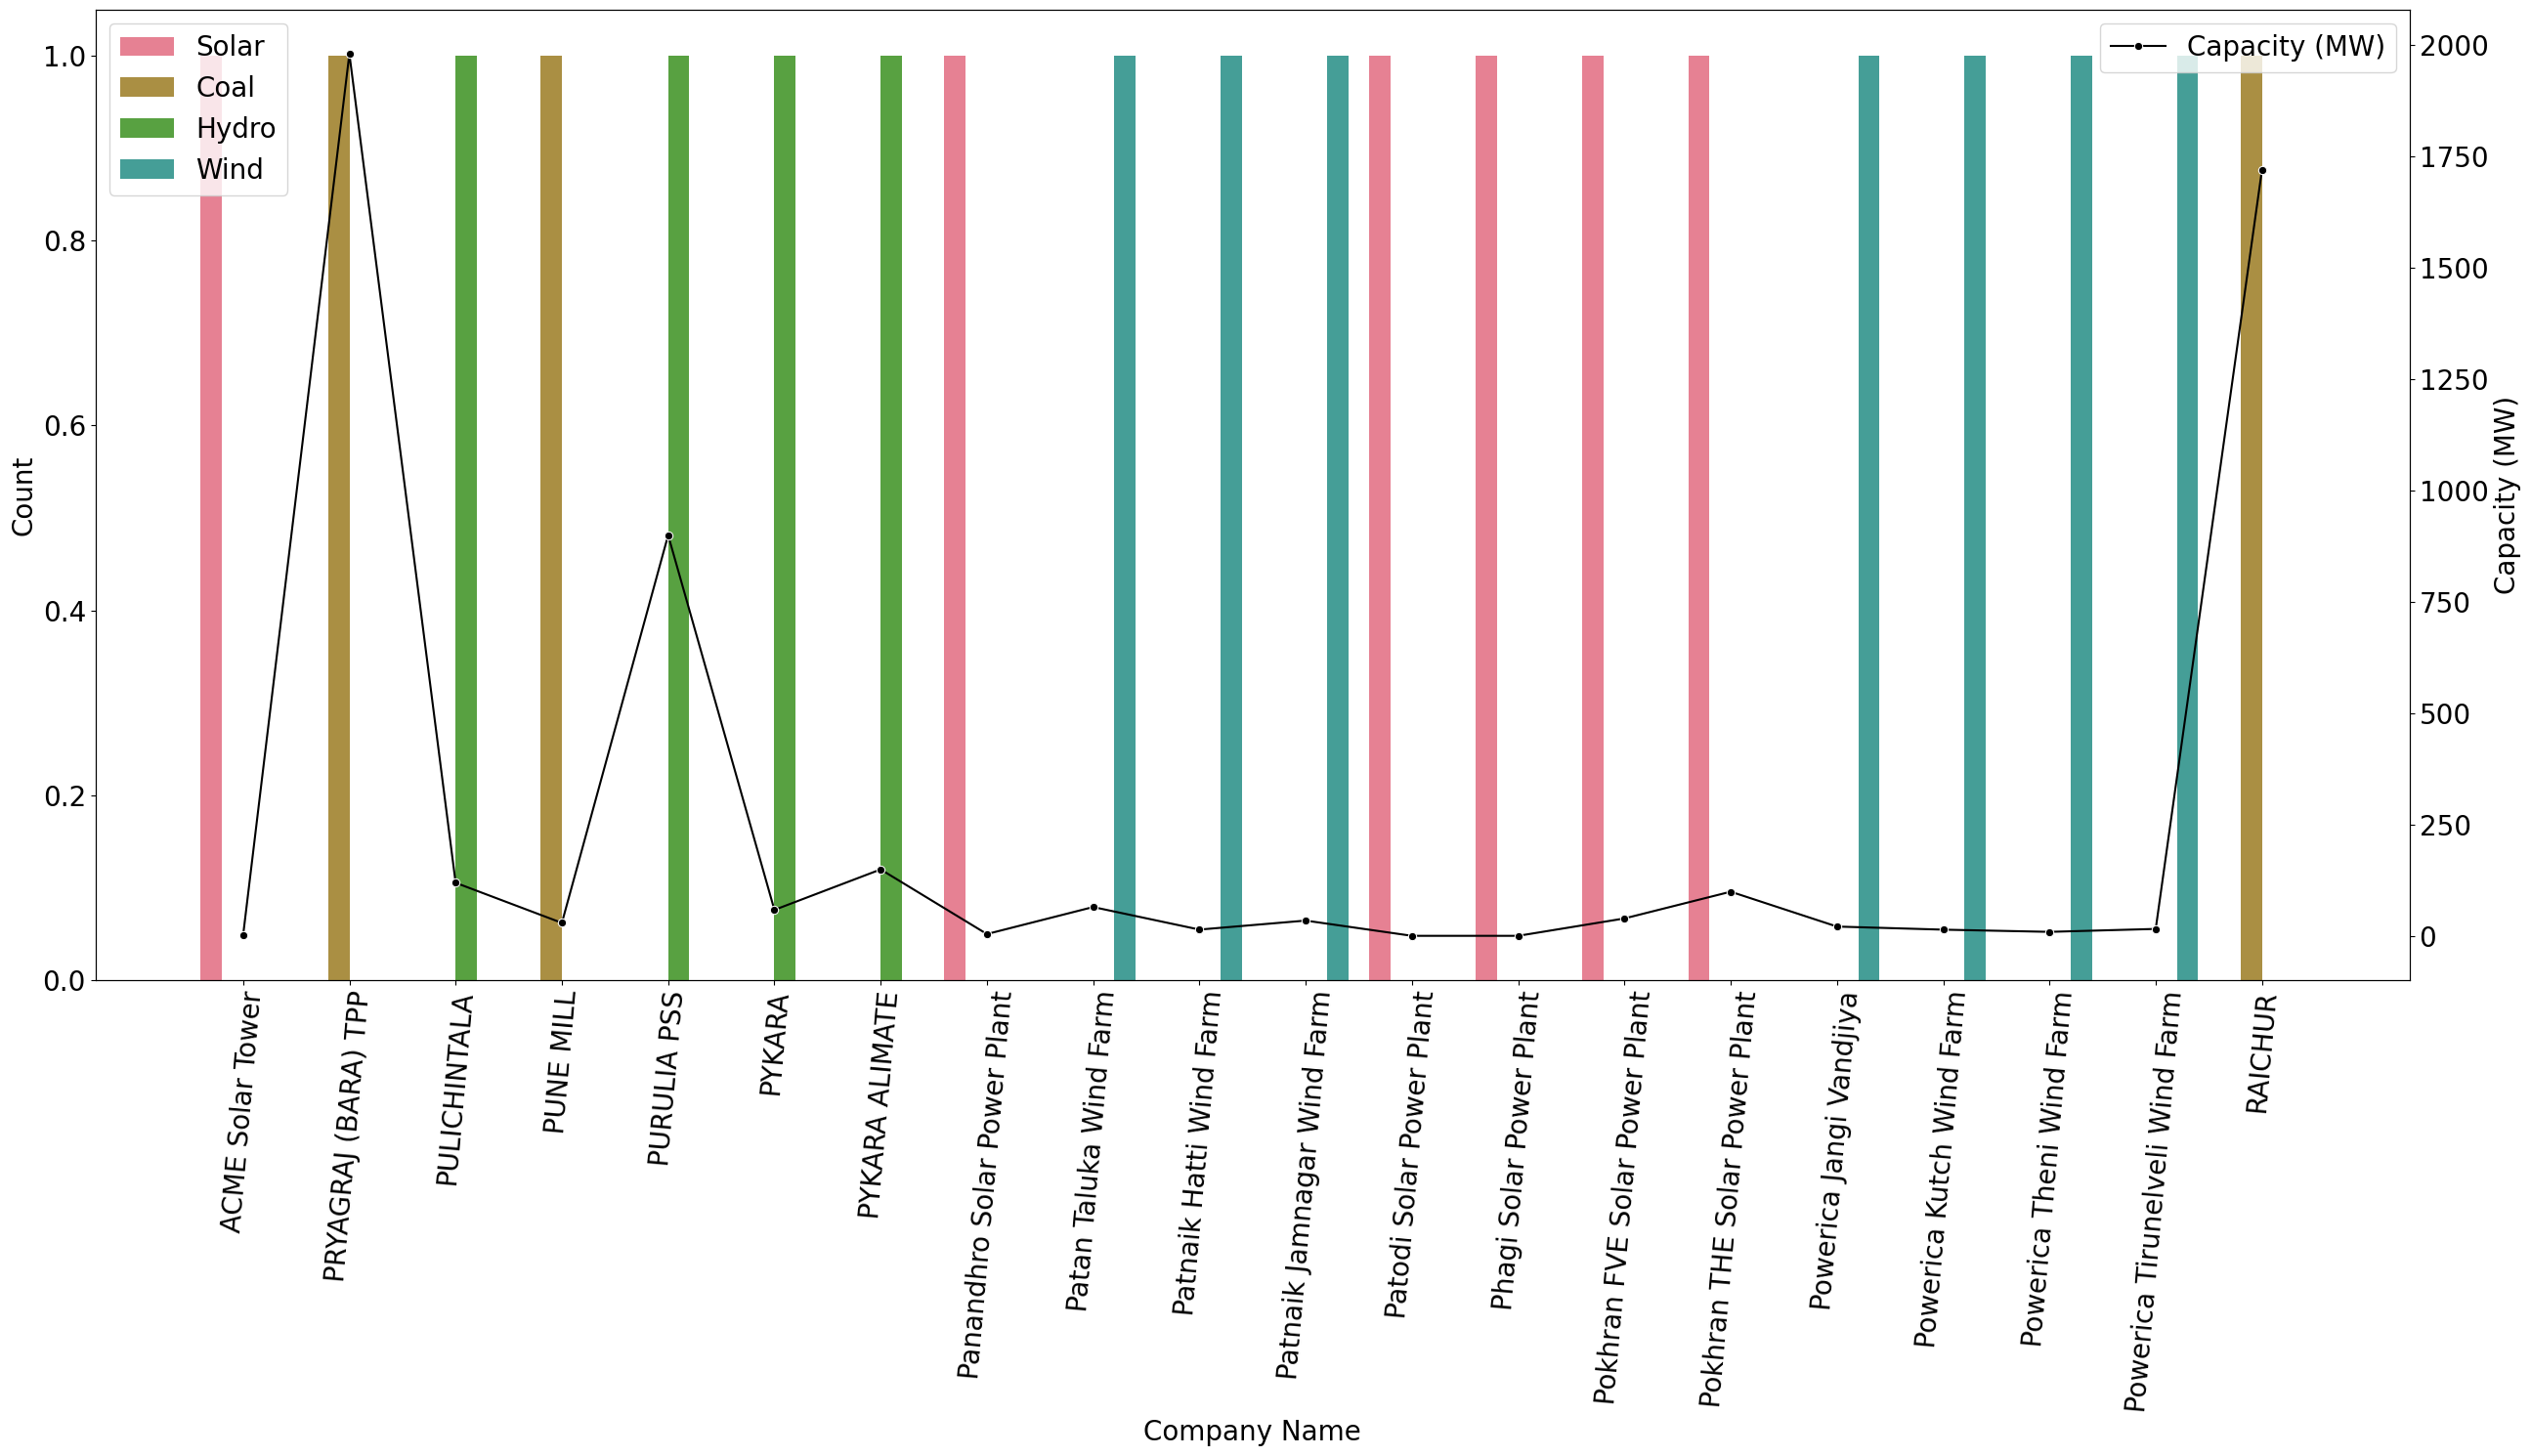

In [38]:
top_n = 20  

top_companies = df['name'].value_counts().nlargest(top_n).index

df_top = df[df['name'].isin(top_companies)]

plt.figure(figsize=(26, 15))
ax = sns.countplot(x='name', hue='primary_fuel', data=df_top)


ax2 = ax.twinx()
sns.lineplot(x='name', y='capacity_mw', data=df_top, color='black', marker='o', ax=ax2, label='Capacity (MW)')

ax.set_xlabel('Company Name', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax2.set_ylabel('Capacity (MW)', fontsize=20)
ax.tick_params(axis='x', rotation=85, labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax.legend(fontsize=20, loc='upper left')
ax2.legend(fontsize=20, loc='upper right')

plt.tight_layout()
plt.show()


- For PRAYAGRAJ(BARA)TPP, the major source of fuel is coal, with a capacity of 1980 MW for power generation. Raichur and PuneMill also contribute to power generation with coal.

- PuruliaPSS is a hydroelectric power plant with the highest capacity of 900 MW, followed by PYKARA ALIMATE with 150 MW. PULICHINTALA and PYKARA are also mentioned in the hydro category.

- Pokhran THE Solar Power Plant has the highest supply of 100 MW, but the source of fuel is mentioned as hydro. The subsequent power plants listed also have their fuel sources mentioned as solar, which seems consistent with their names.

- Patan Taluka Wind Farm has the highest supply of 65.6 MW from wind, consistent with a wind power plant.


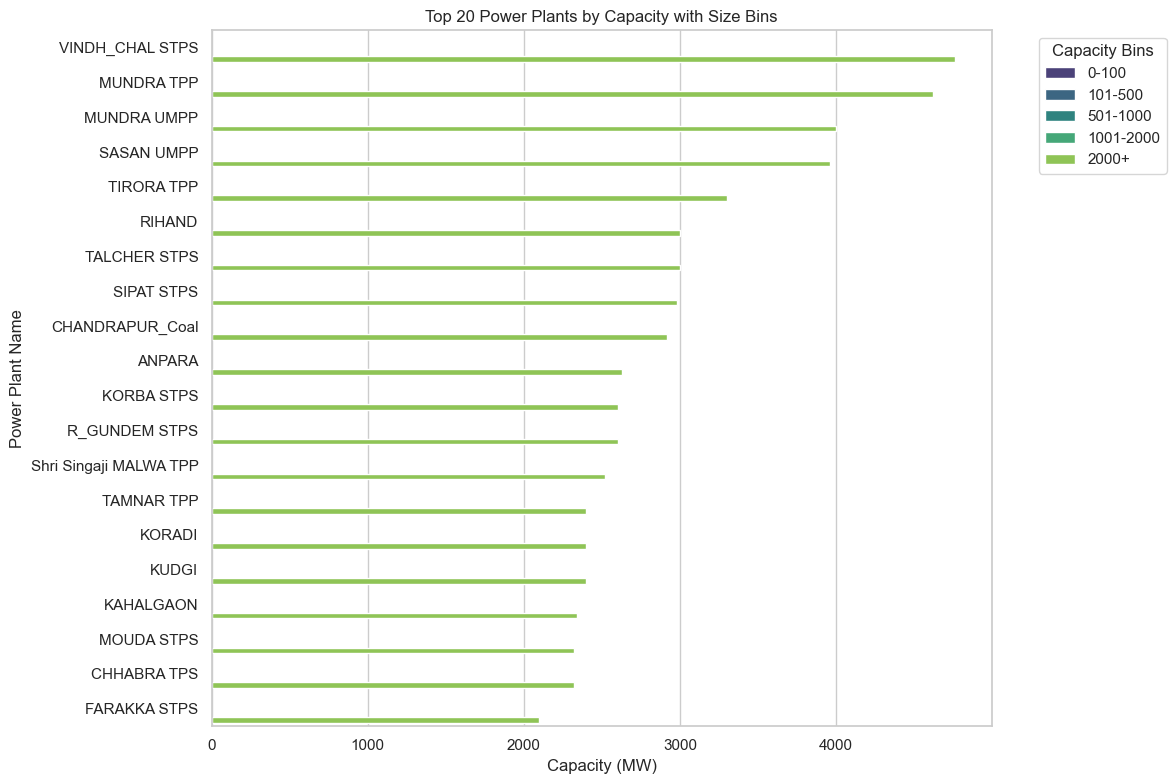

In [39]:
sns.set(style="whitegrid")

df_sorted = df.sort_values(by='capacity_mw', ascending=False)

top_20_entries = df_sorted.head(20)

top_20_entries['capacity_bins'] = pd.cut(top_20_entries['capacity_mw'], bins=[0, 100, 500, 1000, 2000, float('inf')], labels=['0-100', '101-500', '501-1000', '1001-2000', '2000+'])

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='capacity_mw', y='name', data=top_20_entries, palette='viridis', hue='capacity_bins', ci=None)
plt.xlabel('Capacity (MW)')
plt.ylabel('Power Plant Name')
plt.title('Top 20 Power Plants by Capacity with Size Bins')
plt.legend(title='Capacity Bins', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

- Dominance of large plants: The top 20 power plants all have a capacity exceeding 1000 MW, signifying the dominance of large-scale power generation in the region.
- Capacity distribution: The majority of the top 20 plants fall within the two highest capacity bins (1001-2000 and 2000+), highlighting the importance of these large-scale facilities in meeting energy demands.
- Plant identification: The plot allows us to identify the specific power plants with the largest capacities, providing valuable information for further research or analysis.
- Limited representation of smaller plants: While the top 20 focuses on large-scale facilities, it is important to remember that smaller plants also play a role in power generation.

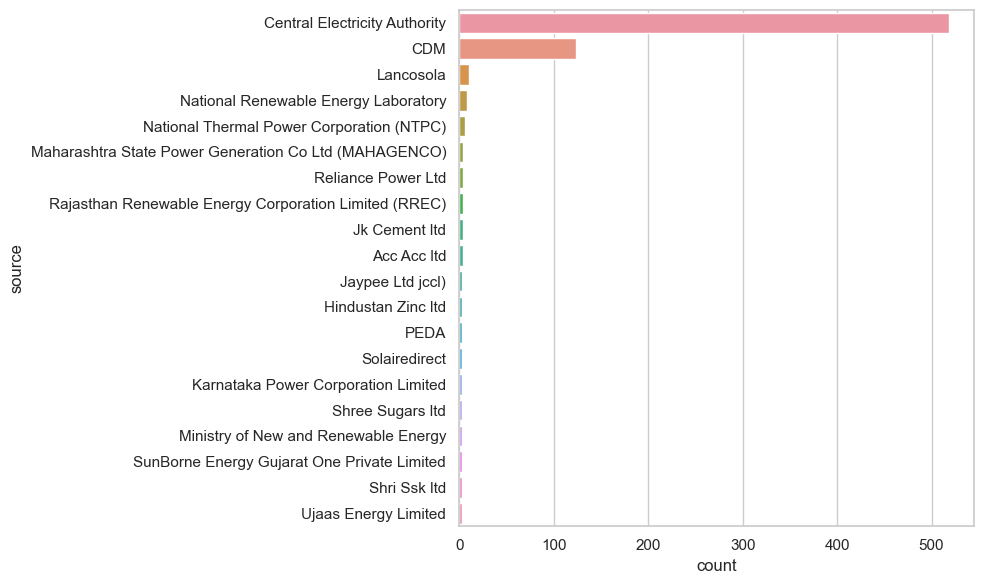

In [40]:
top_n = 20 
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='source', data=df['source'].value_counts().reset_index()[:top_n])
plt.show()


- The bar plot displays the top 20 sources which helps to trace the origin of the information associated with each power plant in the dataset. 
- Central Electricity Authority is the primary contributor, with data from 519 power plants.
- CDM (Clean Development Mechanism) follows with 124 instances, while Lancosola, the National Renewable Energy Laboratory, and the National Thermal Power Corporation (NTPC) contribute to the dataset with 10, 8, and 6 power plants, respectively.

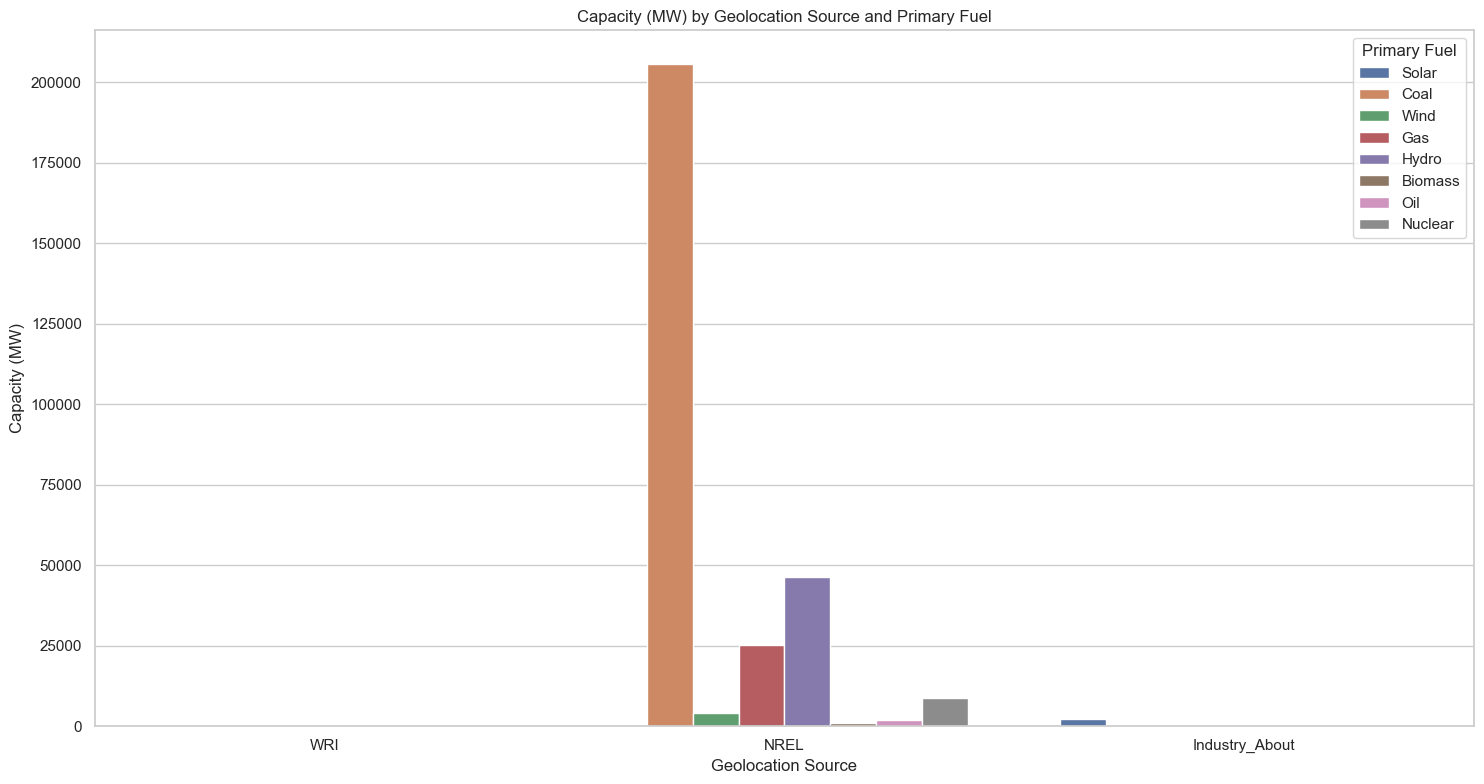

In [41]:
plt.figure(figsize=(15, 8))
sns.barplot(x='geolocation_source', y='capacity_mw', hue='primary_fuel', data=df, estimator=sum, ci=None)


custom_labels = ['WRI', 'NREL', 'Industry_About']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)


plt.xlabel("Geolocation Source")
plt.ylabel("Capacity (MW)")
plt.title("Capacity (MW) by Geolocation Source and Primary Fuel")
plt.legend(title="Primary Fuel")

plt.tight_layout()
plt.show()


- The graph visualize the geolocation source, primary fuel, capacity_mw. The data is from different sources, including the National Renewable Energy Laboratory (NREL), the World Resources Institute (WRI), and Industry About, and covers different types of power plants, such as coal, hydro, solar, and wind.

- Most of the power plants are located in the WRI geolocation source, followed by the NREL and Industry About sources. 
- The primary fuel types with the highest count of power plants are coal and hydro, followed by wind and solar. 


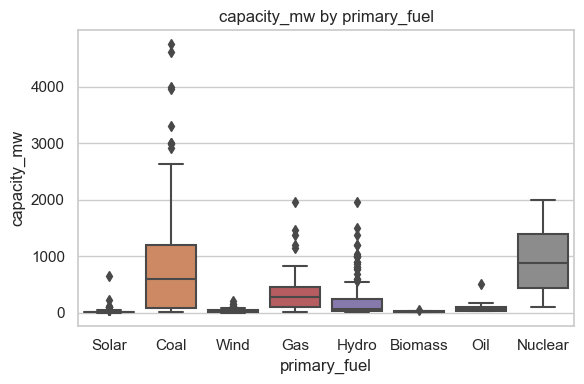

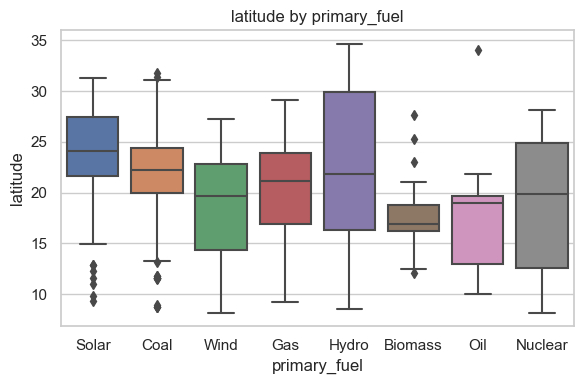

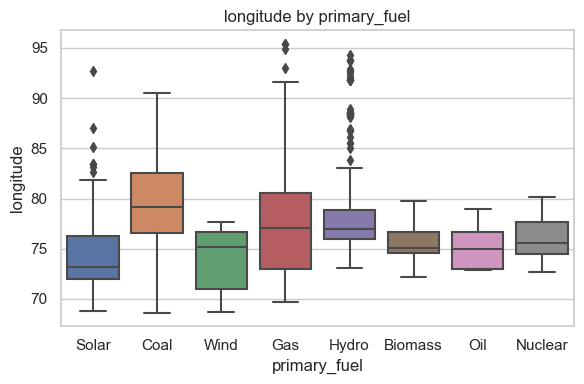

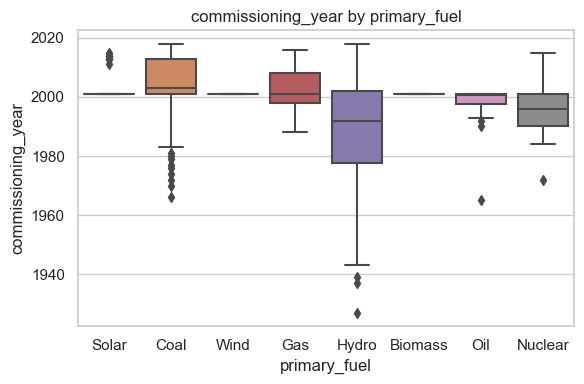

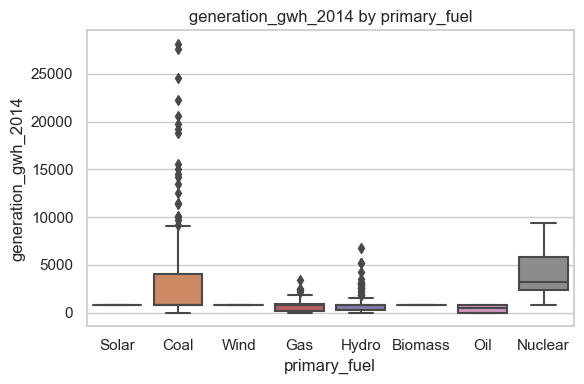

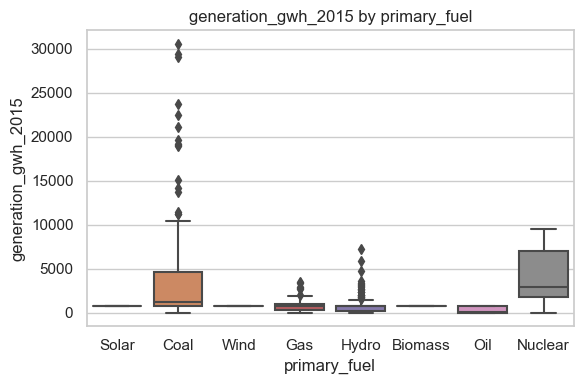

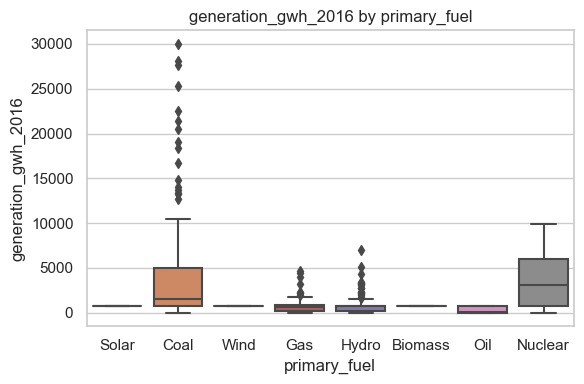

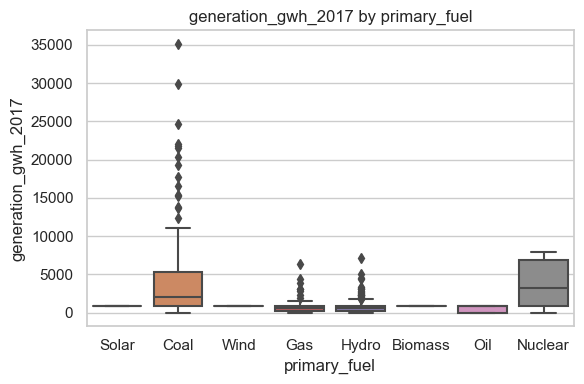

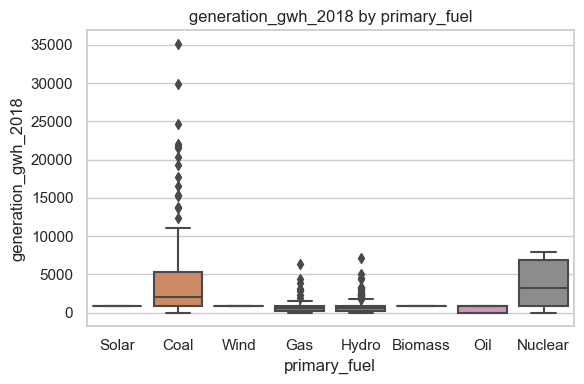

In [42]:
for column in numerical_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='primary_fuel', y=column, data=df)
    plt.title(f'{column} by primary_fuel')
    plt.show()

- Capacity_mw: Coal and gas power plants have a higher median capacity compared to other primary fuel types (hydro, solar, wind). The distribution of capacity_mw for coal and gas power plants is wider, followed by gas and nuclear indicating higher variability in capacity within these categories.

- Commissioning_year: The median commissioning year for different primary fuel types ranges from 2000 to 2020. Nuclear power plants have a higher Interquartile Range (IQR) in commissioning year understand the dispersion or variability in capacity values , spanning from 2004 to 2015. The distribution of commissioning_year is more concentrated for coal, followed by gas.
- Latitude and Longitude: The distribution of latitude and longitude varies for different primary fuel types. Solar power generation is highest at a relatively higher latitude. Coal power generation is highest in terms of longitude, with some outliers.
- Generation Values Across Years: The median and spread of generation values for each primary fuel type are analyzed across the years 2015 to 2018.Coal consistently shows high power generation across all years. Nuclear power plants also exhibit high power generation.

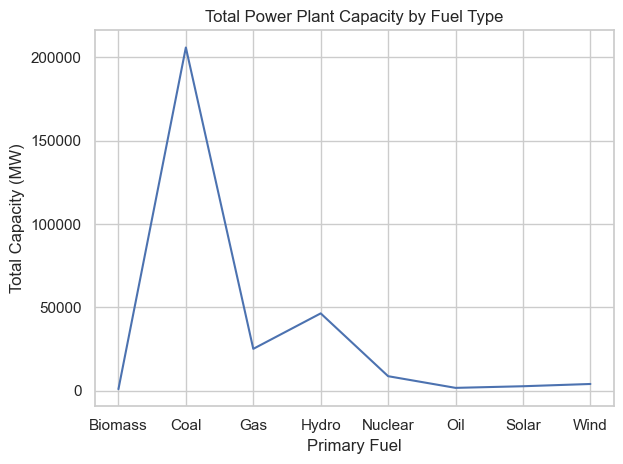

In [43]:
fuel_capacity = df.groupby('primary_fuel')['capacity_mw'].sum()

plt.plot(fuel_capacity) 
plt.xlabel('Primary Fuel')
plt.ylabel('Total Capacity (MW)')
plt.title('Total Power Plant Capacity by Fuel Type')

plt.show()

- The distribution of capacity_mw for coal and Hydro power plants is wider, indicating higher variability in capacity within these categories.

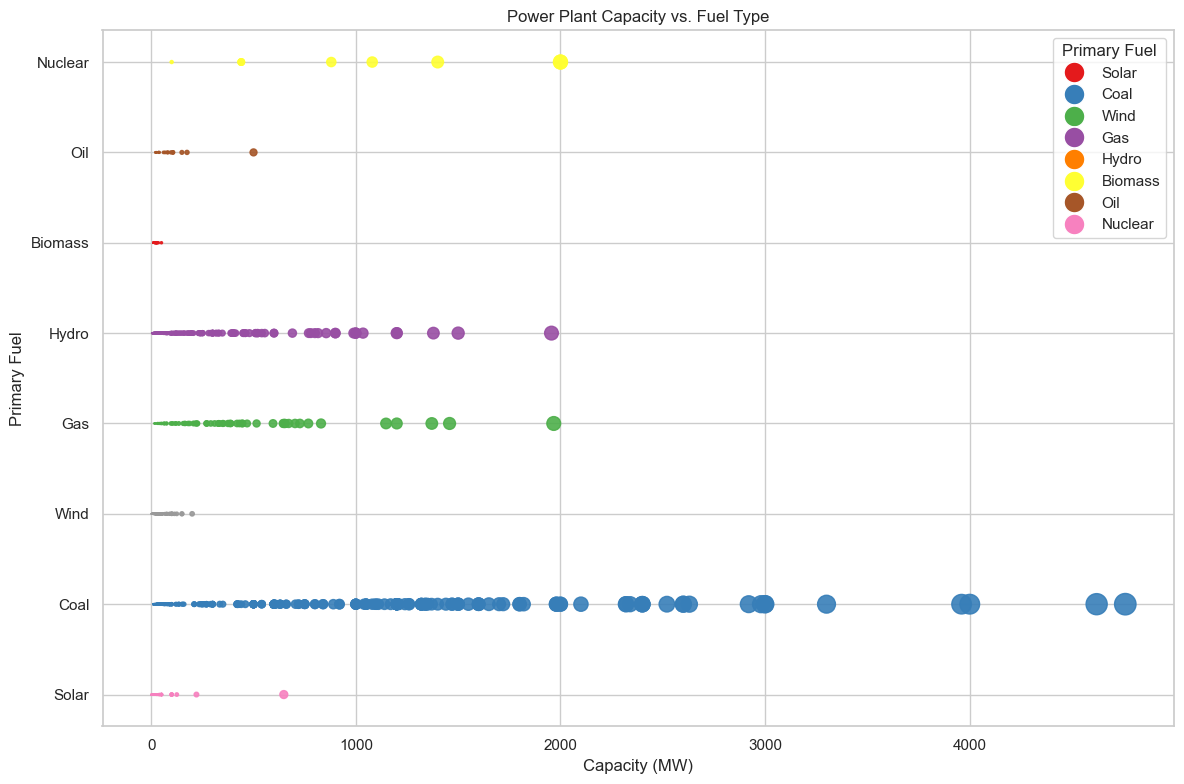

In [44]:
sns.set(style="whitegrid")

palette = sns.color_palette('Set1', n_colors=len(df['primary_fuel'].unique()))

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['capacity_mw'], df['primary_fuel'], c=df['primary_fuel'].astype('category').cat.codes, cmap='Set1', s=df['capacity_mw']/20, alpha=0.9)

legend_labels = df['primary_fuel'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=15, label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Primary Fuel')

plt.xlabel('Capacity (MW)')  
plt.ylabel('Primary Fuel')
plt.title('Power Plant Capacity vs. Fuel Type')

plt.show()

- It is evident that coal and gas power plants have a higher capacity compared to other primary fuel types, then followed by hydro and nuclear where there is a wide range of capacities within each primary fuel type.

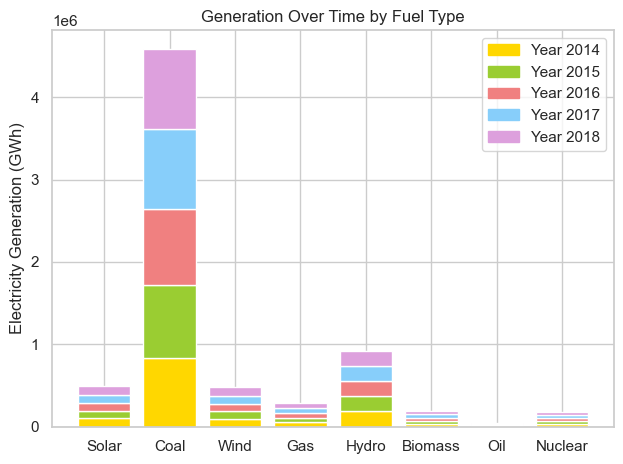

In [45]:
import matplotlib.patches as mpatches

fuels = df['primary_fuel'].unique()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'plum']

generation = [df['generation_gwh_' + str(x)].sum() for x in range(2014, 2019)]

fig, ax = plt.subplots()
bottom = [0] * len(fuels)

for i in range(len(generation)):
    year_generation = [df[df['primary_fuel'] == fuel]['generation_gwh_' + str(2014 + i)].sum() for fuel in fuels]
    bars = ax.bar(fuels, year_generation, bottom=bottom, color=colors[i])
    bottom = [x + y for x, y in zip(year_generation, bottom)]

ax.set_ylabel('Electricity Generation (GWh)')

# Create custom legend
legend_patches = [mpatches.Patch(color=colors[i], label=f'Year {2014 + i}') for i in range(len(generation))]
ax.legend(handles=legend_patches)

ax.set_title('Generation Over Time by Fuel Type')

plt.show()

- The graph shows the electricity generation (GWh) over time (2014-2018) for different primary fuel types. 
- Each bar represents a fuel type, and the colors within each bar represent the generation for each year.
- The legend shows the year associated with each color. By examining the graph, we can identify the fuel types with higher electricity generation in all years is from coal followed by wind and solar 

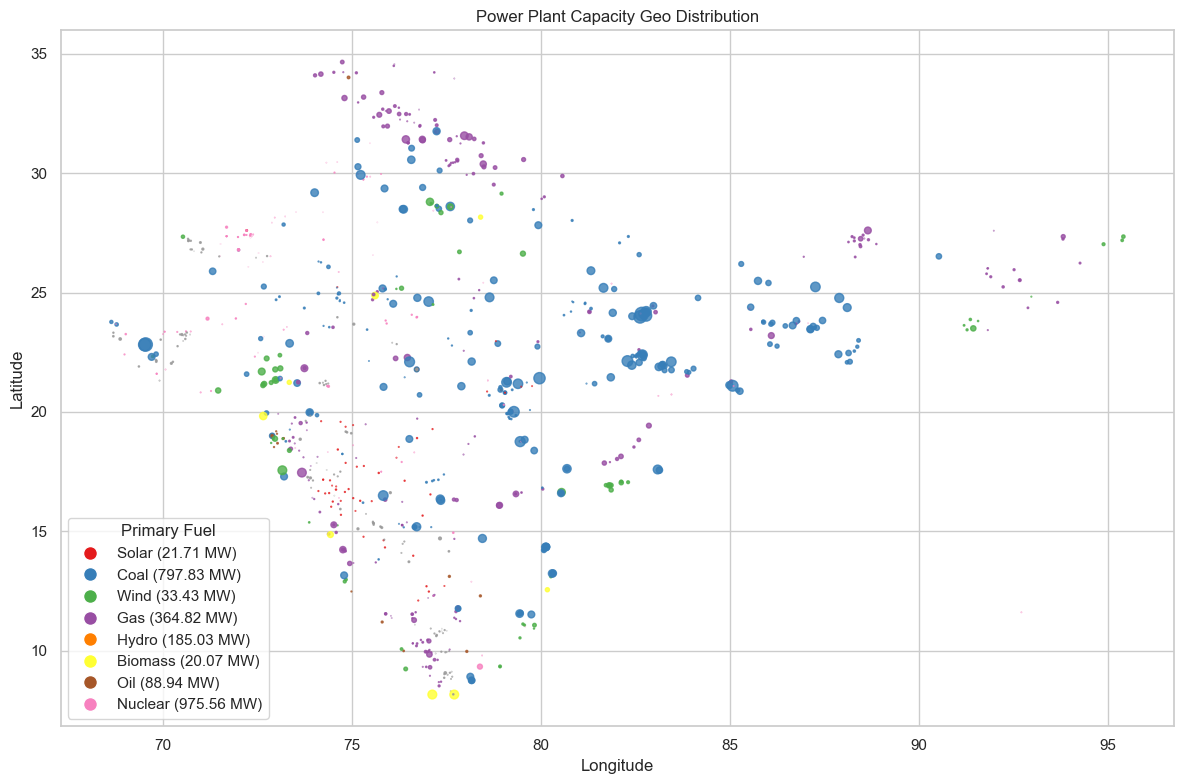

In [46]:
sns.set(style="whitegrid")
palette = sns.color_palette('Set1', n_colors=len(df['primary_fuel'].unique()))

fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(df['longitude'], df['latitude'], s=df['capacity_mw']/50, c=df['primary_fuel'].astype('category').cat.codes, cmap='Set1', alpha=0.8)

legend_labels = df['primary_fuel'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=10, label=f'{label} ({df[df["primary_fuel"]==label]["capacity_mw"].mean():.2f} MW)') for i, label in enumerate(legend_labels)]
ax.legend(handles=legend_handles, title='Primary Fuel')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Power Plant Capacity Geo Distribution')

plt.show()

- The dataset includes various attributes such as the primary fuel type, capacity, latitude, and longitude indicating the different zones of India have different primiary_fuel production that generates the power
- The primary fuel types include categories such as Nulcear, Coal, Oil, Gas, Hydro, Biomass, and Solar.
- The capacity of the power plants varies, ranging from a few megawatts to several hundred megawatts coming mostly from coal from different parts of India


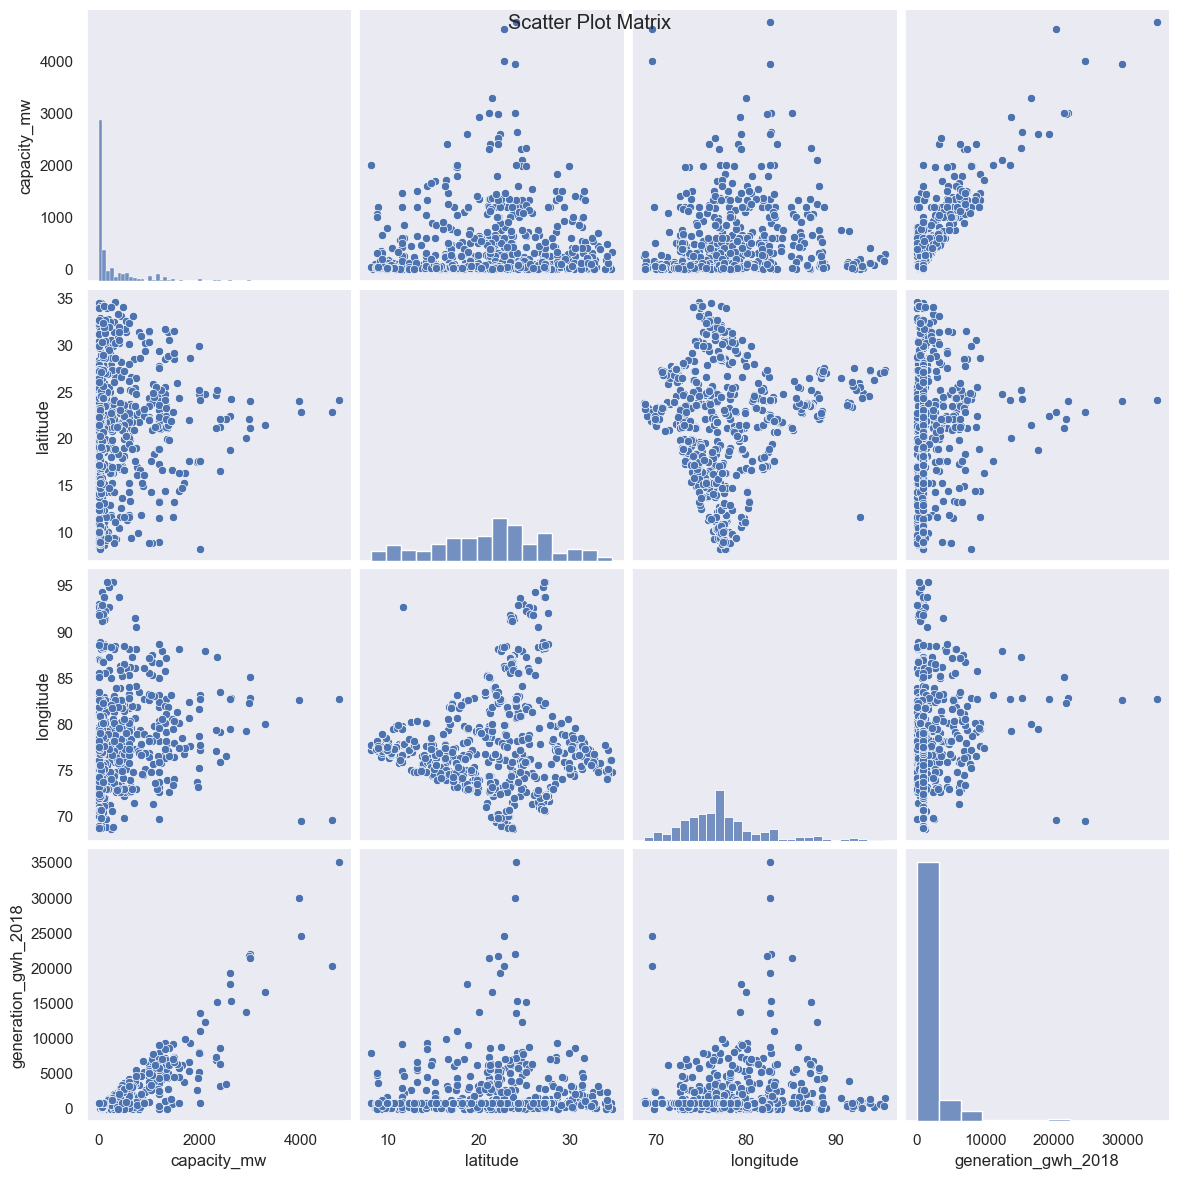

In [47]:
sns.set(style="dark")
sns.pairplot(df[['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2018']], height=3)
plt.suptitle('Scatter Plot Matrix')
plt.show()


- capacity_mw vs latitude : There is a weak positive correlation between capacity_mw and latitude. This means that power plants with higher capacity tend to be located at higher latitudes.
- capacity_mw vs longitude: There is a weak negative correlation between capacity_mw and longitude. This means that power plants with higher capacity tend to be located at lower longitudes.
- capacity_mw vs generation_gwh_2018 : There is a strong positive correlation between capacity_mw and generation_gwh_2018. This means that power plants with higher capacity tend to generate more electricity.
- latitude vs longitude : There is a weak negative correlation between latitude and longitude. This means that power plants located at higher latitudes tend to be located at lower longitudes.
- latitude vs generation_gwh_2018 : There is a weak positive correlation between latitude and generation_gwh_2018. This means that power plants located at higher latitudes tend to generate more electricity.
- longitude vs generation_gwh_2018 : There is a weak negative correlation between longitude and generation_gwh_2018. This means that power plants located at lower longitudes tend to generate more electricity.

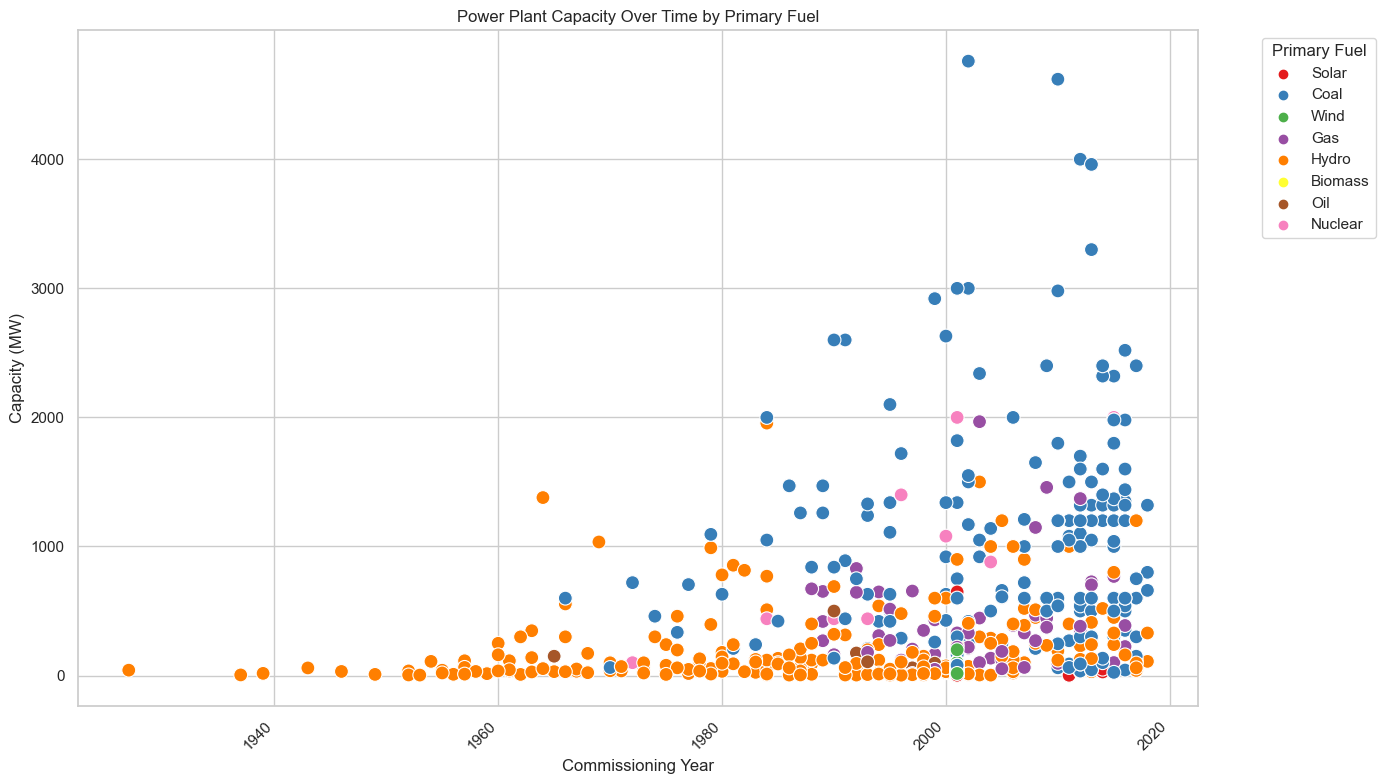

In [48]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.scatterplot(x='commissioning_year', y='capacity_mw', hue='primary_fuel', data=df, palette='Set1', s=100)
plt.xlabel('Commissioning Year')
plt.ylabel('Capacity (MW)')
plt.title('Power Plant Capacity Over Time by Primary Fuel')
plt.legend(title='Primary Fuel', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')

plt.show()


- All primary fuel types show a general upward trend in capacity over time. This indicates an overall increase in power generation capacity, regardless of fuel source.
- Dominant fuels: Coal and natural gas are the two dominant primary fuels, with significantly higher capacity compared to hydro, wind, and solar.
- Shifting trends: While coal has historically been the dominant fuel, its growth has stagnated in recent years. Natural gas, on the other hand, has experienced the fastest and most consistent growth, potentially indicating a shift towards this cleaner-burning fossil fuel.
- Renewables on the rise: Although still lagging behind fossil fuels, both wind and solar are experiencing significant and rapid growth in capacity. This suggests a growing emphasis on renewable energy sources for future power generation.
- Hydropower remains stable: Hydropower capacity shows a relatively stable trend, with limited growth compared to other sources. This could be due to limited available resources for new hydropower projects.


In [49]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

In [50]:
df.drop(columns = ['name','country_long','gppd_idnr'],axis=1,inplace=True)

- The columns name, country_long, and gppd_idnr have been dropped from the DataFrame. These columns are considered to be irrelevant or not contributing significantly to the predictions

### Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df, columns):
    """
    Encode categorical columns in a DataFrame using LabelEncoder.

    Parameters:
    - df: DataFrame
    - columns: list of column names to be encoded

    Returns:
    - DataFrame: DataFrame with encoded columns
    - dict: Mapping of label encoders for each column
    """

    label_encoders = {}

    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders

encoded_df, encoders = encode_categorical_columns(df, ['primary_fuel', 'source', 'geolocation_source'])
encoders

{'primary_fuel': LabelEncoder(),
 'source': LabelEncoder(),
 'geolocation_source': LabelEncoder()}

In [52]:
df = encoded_df
df

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407             6                2011   
1           98.0   24.7663    74.6090             1                2001   
2           39.2   21.9038    69.3732             7                2001   
3          135.0   23.8712    91.3602             2                2004   
4         1800.0   21.9603    82.4091             1                2015   
..           ...       ...        ...           ...                 ...   
902       1600.0   16.2949    77.3568             1                2016   
903          3.0   12.8932    78.1654             6                2001   
904         25.5   15.2758    75.5811             7                2001   
905         80.0   24.3500    73.7477             1                2001   
906         16.5    9.9344    77.4768             7                2001   

     source  geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0       109                   1           801.123775           711.181225   
1       174                   2           801.123775           711.181225   
2        21                   2           801.123775           711.181225   
3        22                   2           617.789264           843.747000   
4        22                   2          3035.550000          5916.370000   
..      ...                 ...                  ...                  ...   
902      22                   2           801.123775             0.994875   
903      77                   0           801.123775           711.181225   
904      21                   2           801.123775           711.181225   
905      59                   2           801.123775           711.181225   
906      21                   2           801.123775           711.181225   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0             737.205450           817.977250           817.977250  
1             737.205450           817.977250           817.977250  
2             737.205450           817.977250           817.977250  
3             886.004428           663.774500           663.774500  
4            6243.000000          5385.579736          5385.579736  
..                   ...                  ...                  ...  
902           233.596650           865.400000           865.400000  
903           737.205450           817.977250           817.977250  
904           737.205450           817.977250           817.977250  
905           737.205450           817.977250           817.977250  
906           737.205450           817.977250           817.977250  

[907 rows x 12 columns]

- All the categorical columns have been encoded

### Checking for skewness

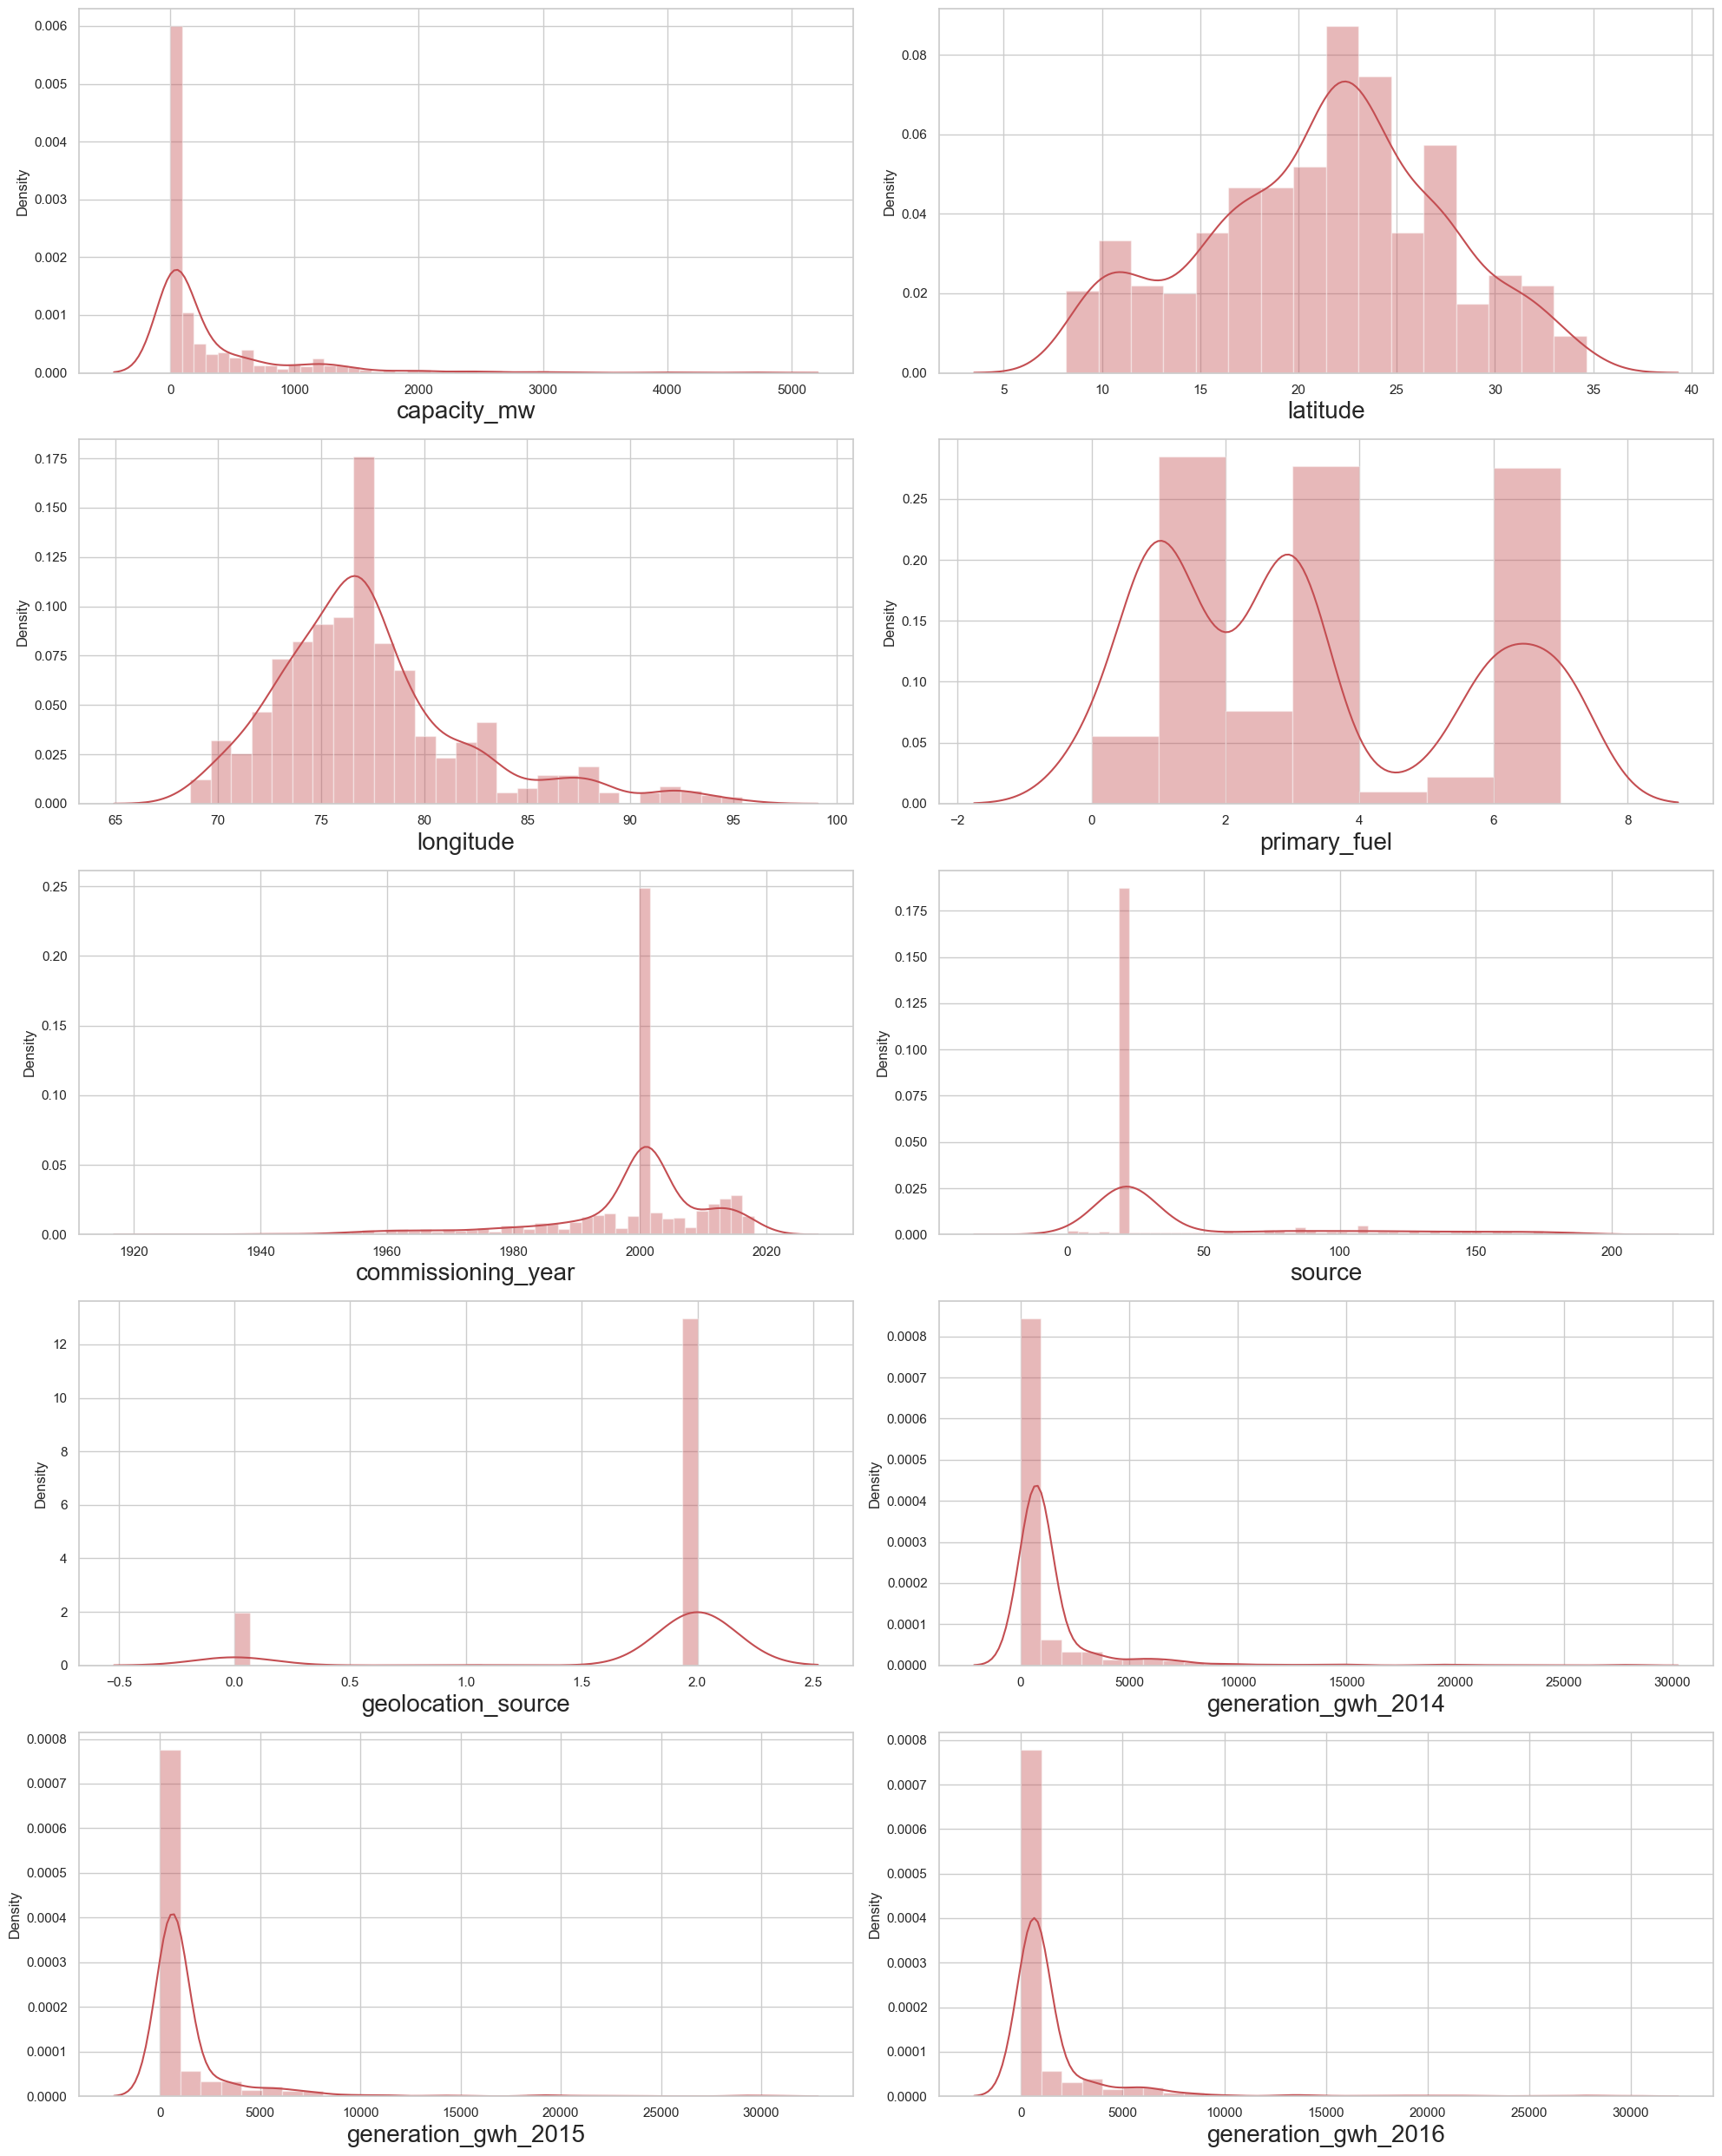

In [53]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.distplot(df[col], color='r')  
        plt.xlabel(col, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

- The data exhibits significant positive skewness rightward tail in the distributions in features such as capacity_mw, latitude, longitude, and generation_gwh for the years 2014 to 2016.

In [54]:
from scipy.stats import boxcox
from scipy.stats import skew

def remove_skewness(df):
    
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    continuous_cols = [col for col in numeric_cols if len(df[col].unique()) > 5]  
    continuous_cols = [col for col in continuous_cols if col != 'year']
    skewness_before = df[continuous_cols].apply(lambda x: skew(x))
    df[continuous_cols] = df[continuous_cols].apply(lambda x: boxcox(x + 1)[0])  
    
    
    skewness_after = df[continuous_cols].apply(lambda x: skew(x))
    skewness_summary = pd.DataFrame({'Skewness Before': skewness_before, 'Skewness After': skewness_after})
    
    return skewness_summary

skewness_summary = remove_skewness(df)

print("Skewness Summary:")
skewness_summary

Skewness Summary:
                     Skewness Before  Skewness After
capacity_mw                 3.118408        0.022128
latitude                   -0.163880       -0.076419
longitude                   1.161396        0.003460
generation_gwh_2014         5.312556        0.285433
generation_gwh_2015         5.557563        0.221784
generation_gwh_2016         5.273213        0.203673
generation_gwh_2017         5.306309        0.196490
generation_gwh_2018         5.306309        0.196490


- After applying the Box-Cox transformation, the skewness values for the features have been significantly reduced, indicating that the data distributions are now closer to a normal distribution. 

### Assessing the skewness after applying boxcox

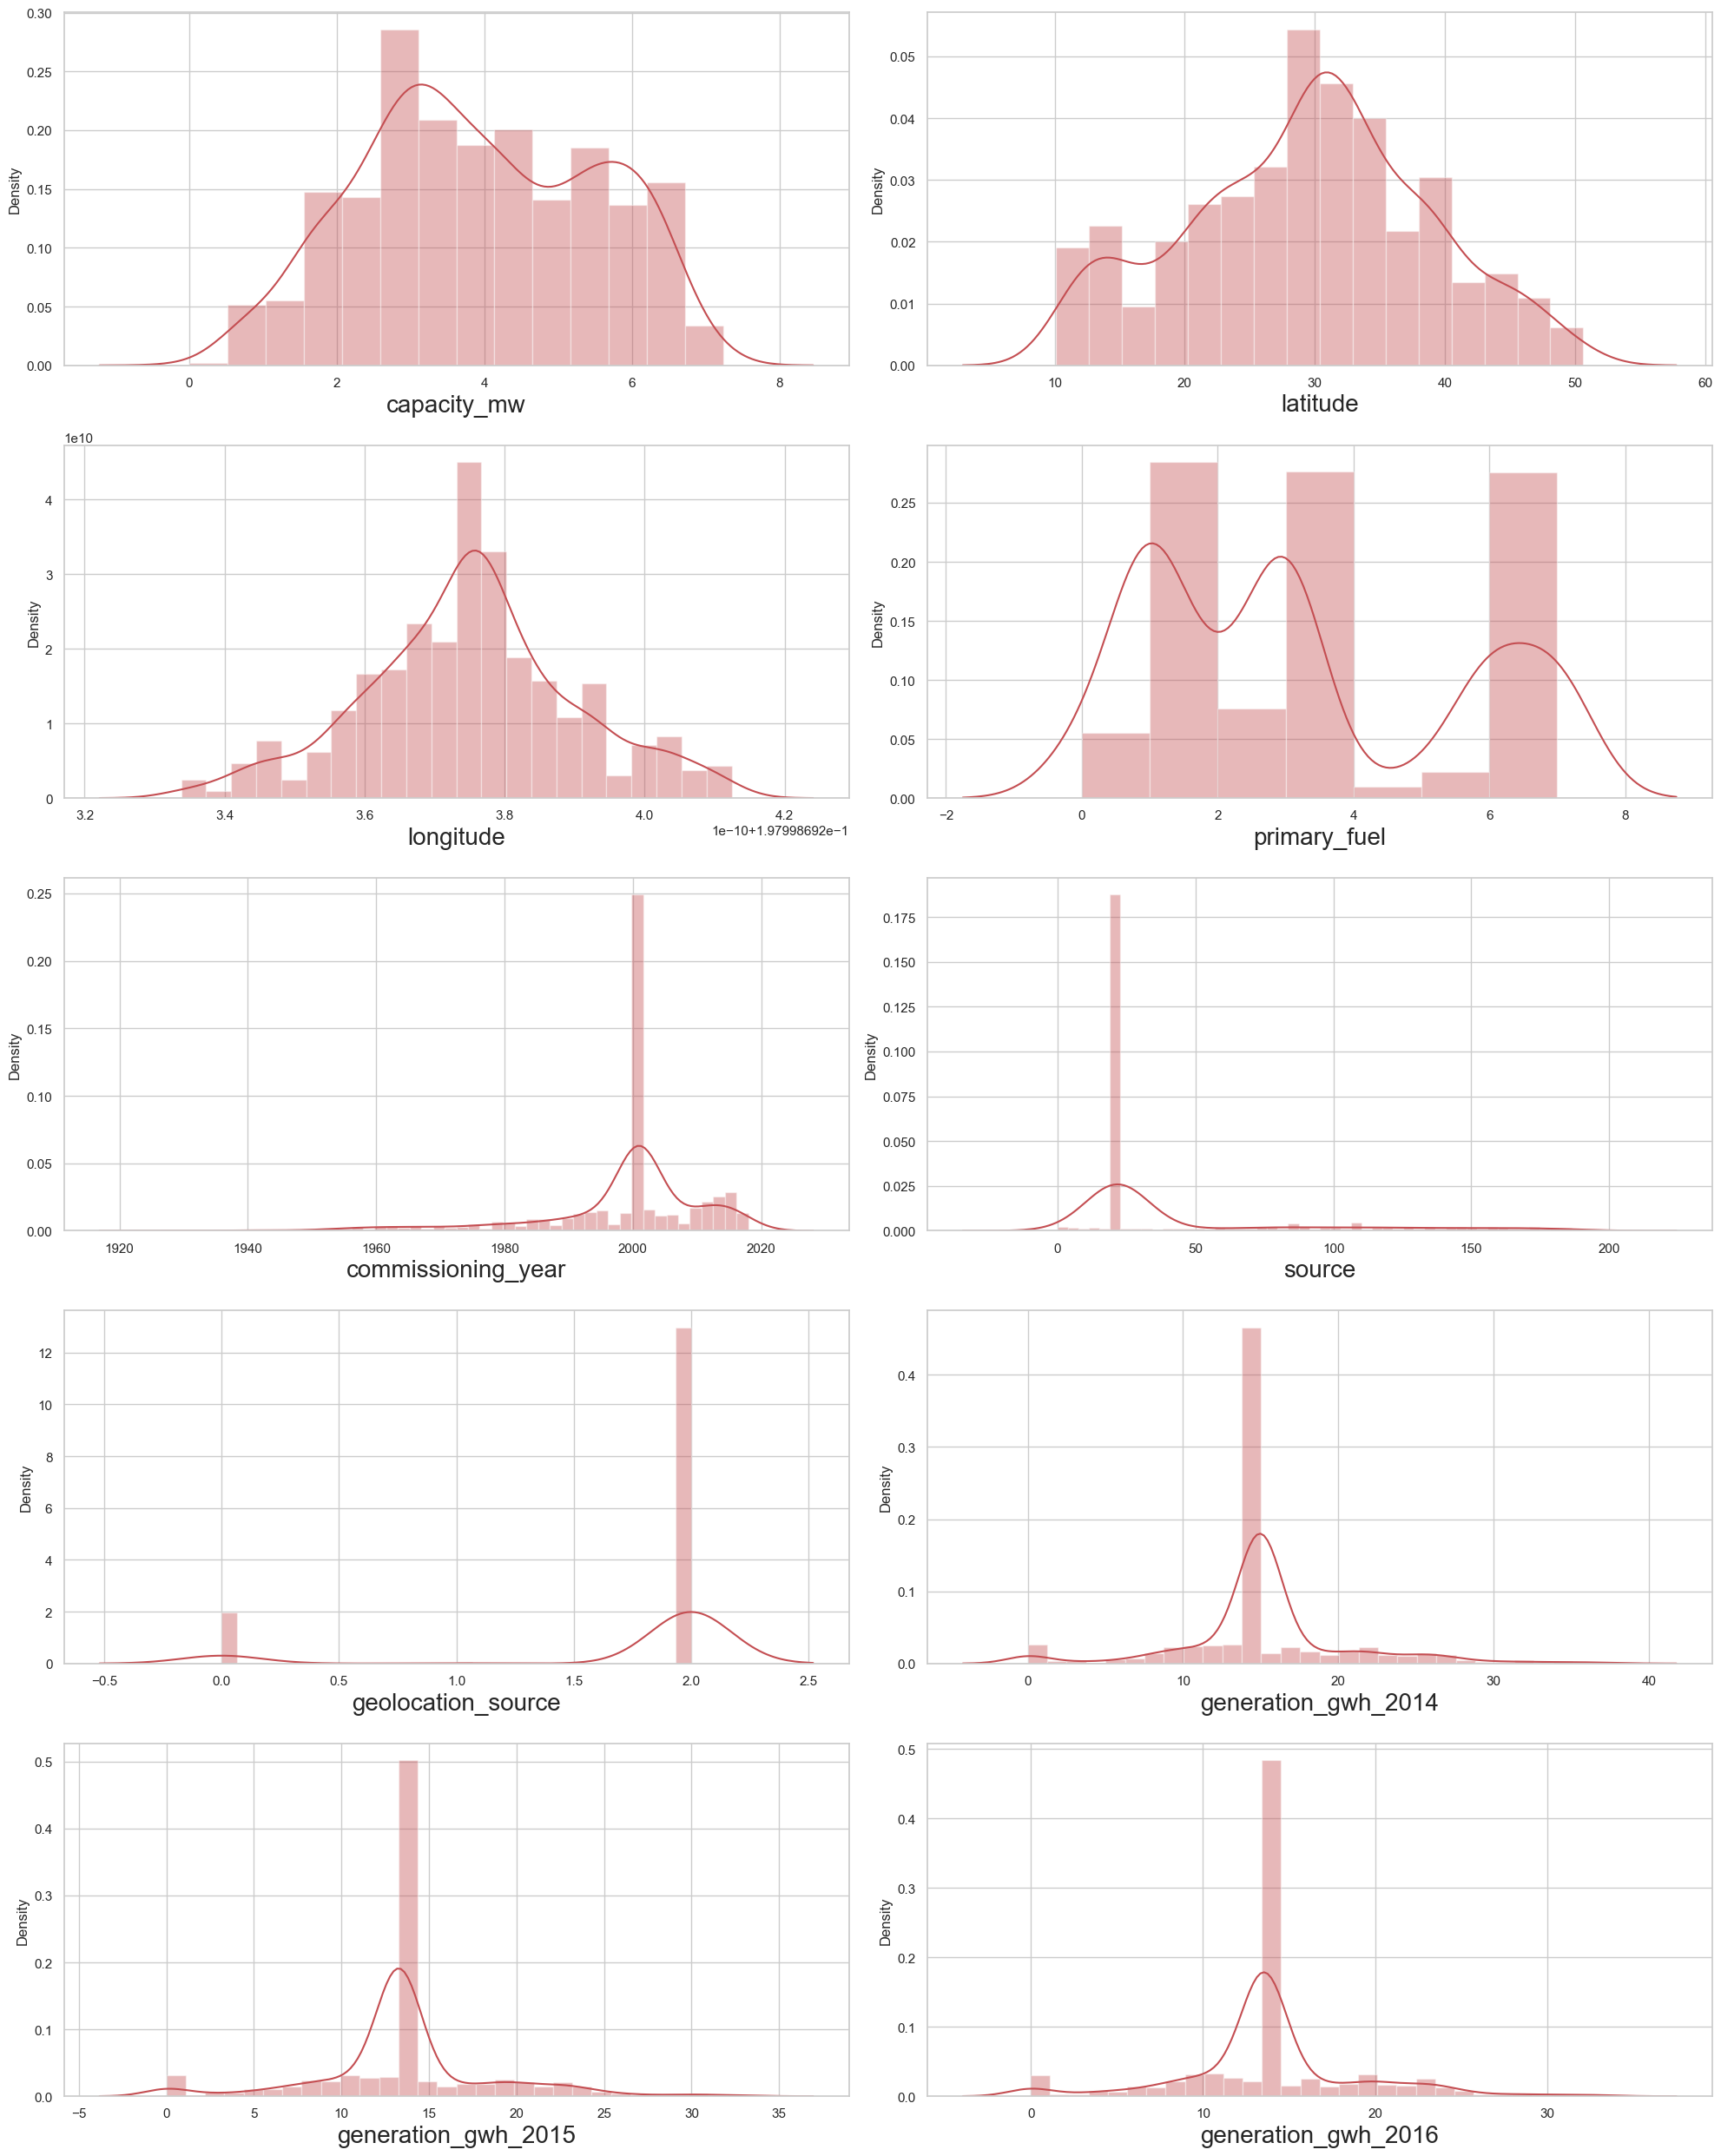

In [55]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.distplot(df[col], color='r')  
        plt.xlabel(col, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

- skewness is almost removed after applying boxcox

### Checking for outliers 

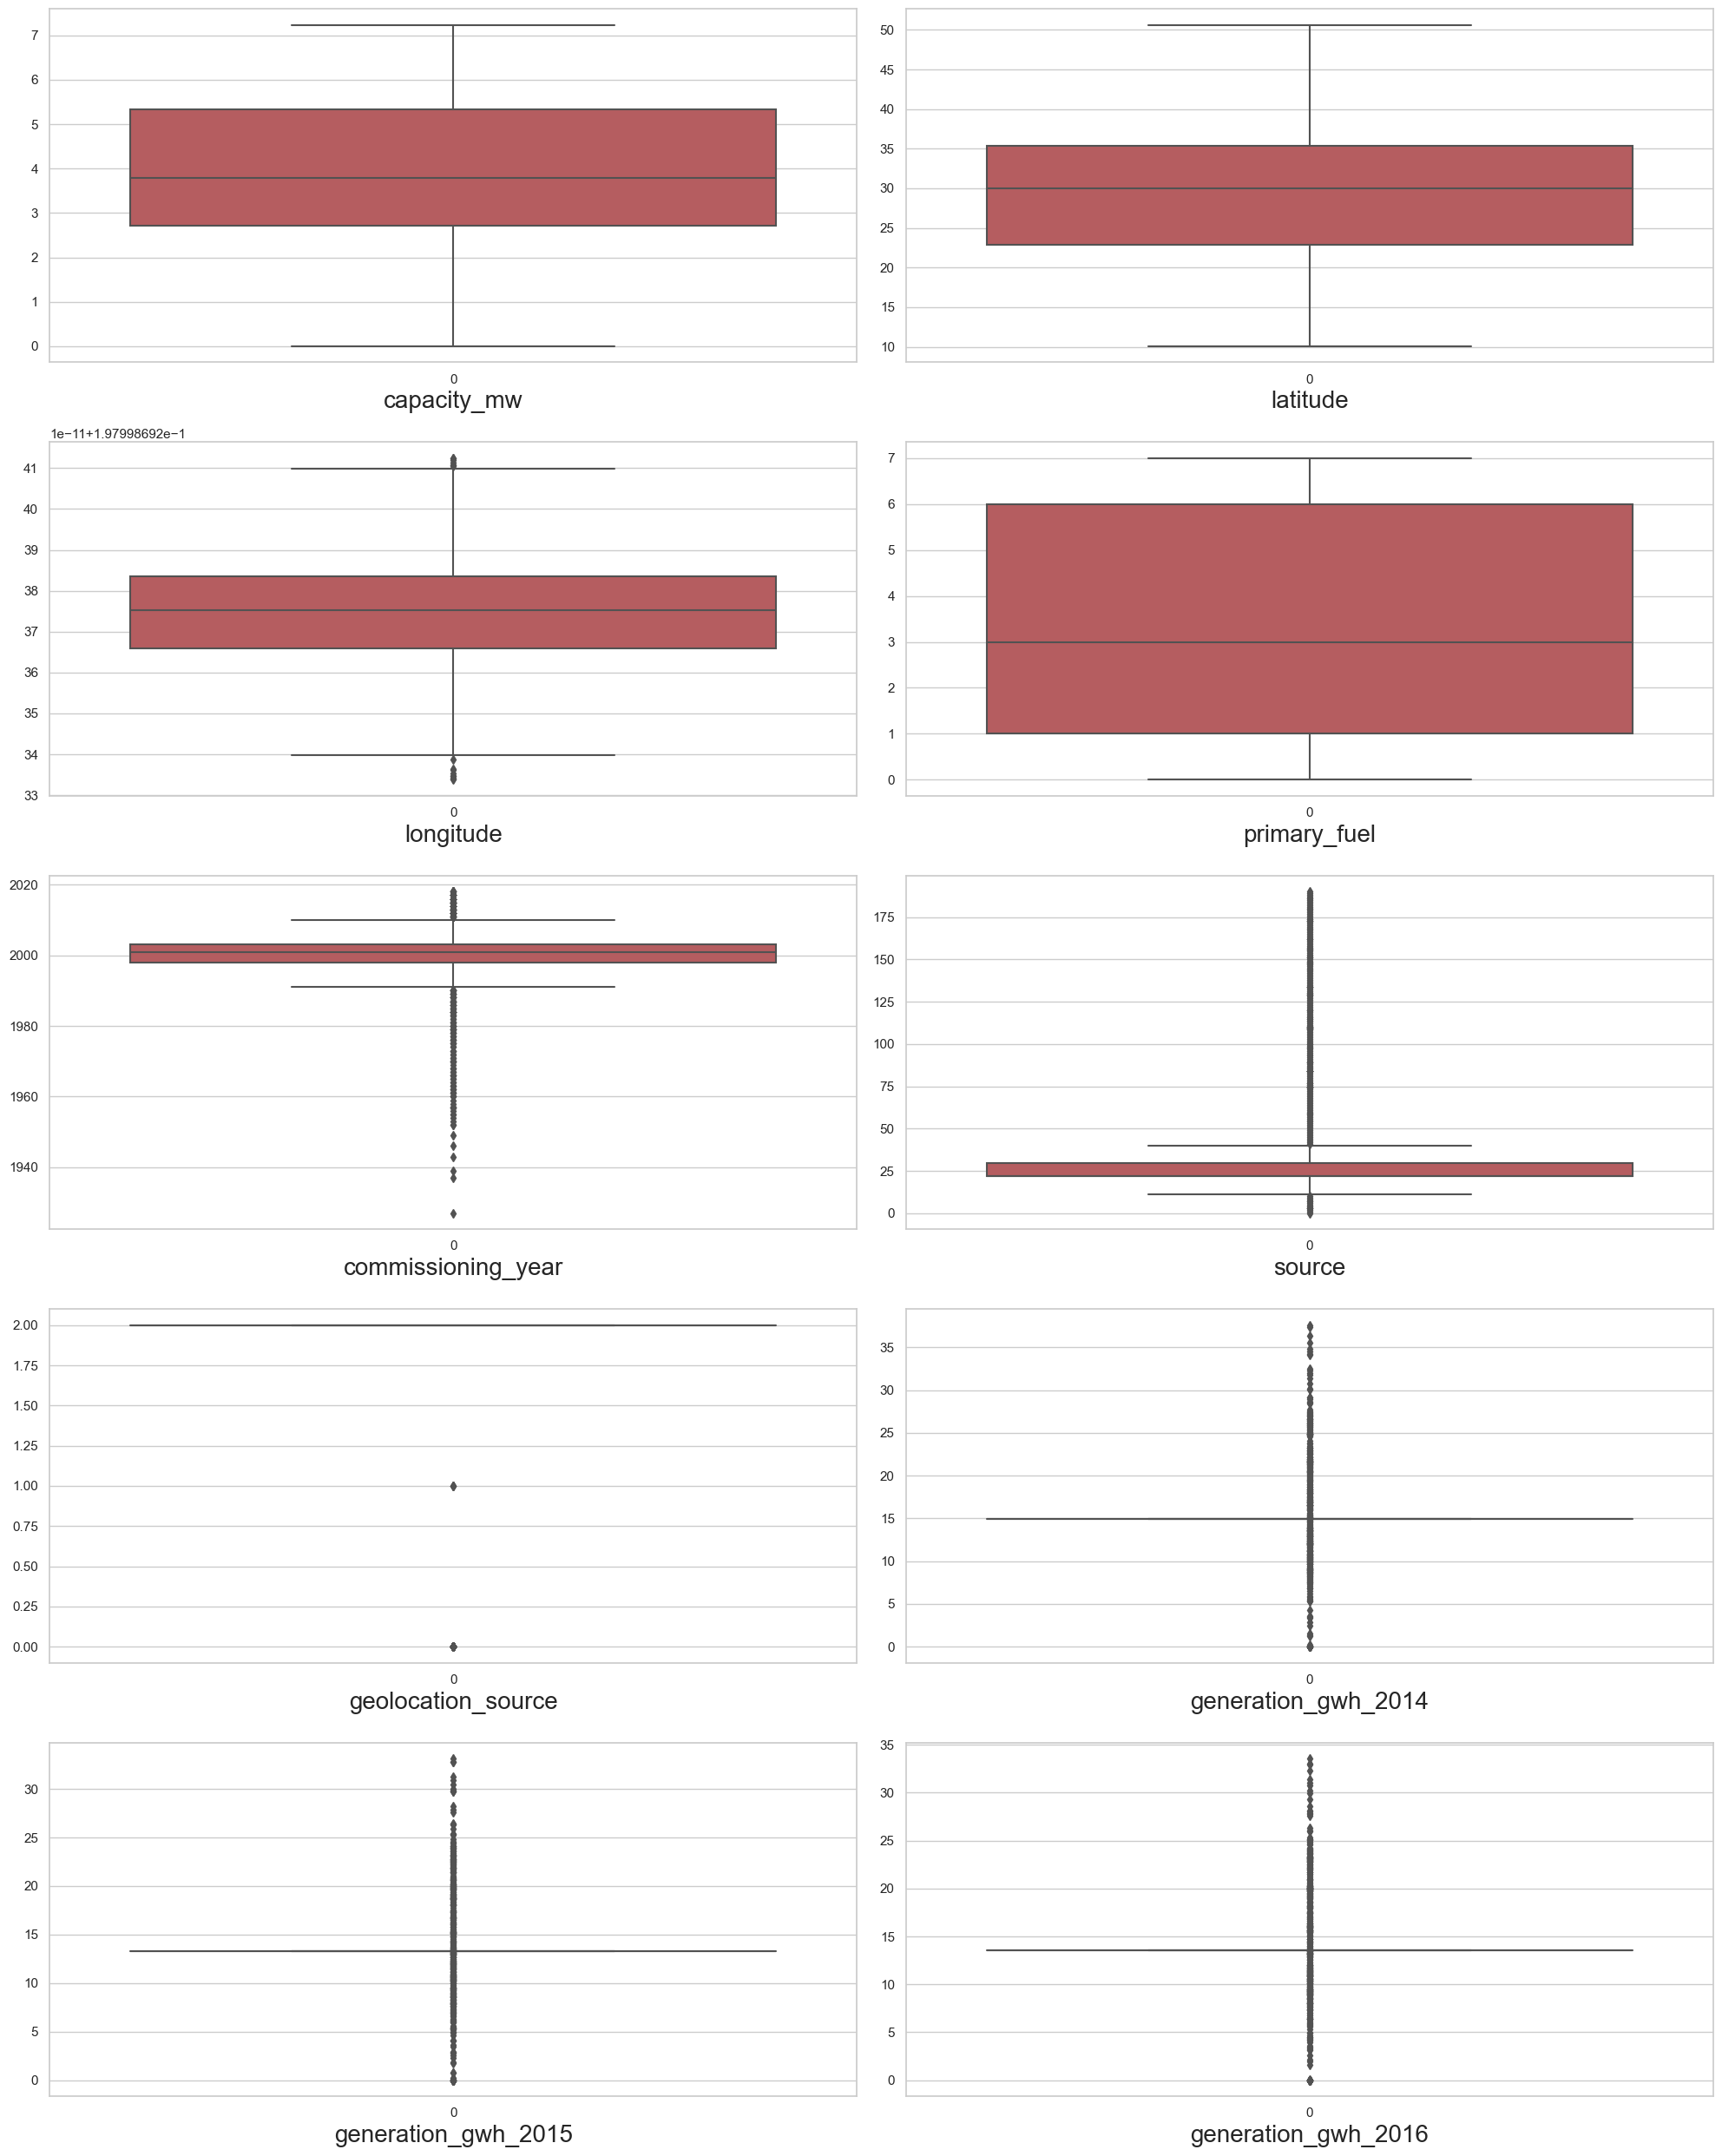

In [56]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot(df[col], color='r')  
        plt.xlabel(col, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

- the data has so many outliers

### Remove outliers using zscore

In [57]:
from scipy import stats
def remove_outliers(df):
    # Exclude the target variable if it's present
    if 'primary_fuel' in df.columns:
        target_col = df['primary_fuel']
        df = df.drop(['primary_fuel'], axis=1)
    else:
        target_col = None

    # Iterate through each column in the DataFrame
    for col in df.columns:
        # Use z-score to identify and remove outliers
        z_scores = np.abs(stats.zscore(df[col]))
        df = df[(z_scores < 3)]

    # Add the target variable back to the DataFrame
    if target_col is not None:
        df['primary_fuel'] = target_col
    
    return df

# Remove outliers from all columns in the DataFrame
df= remove_outliers(df)


In [58]:
df.shape

(860, 12)

- The shape is 860 rows and 12 columns after removing outliers

### Assessing the spread of outliers after application of z-scores

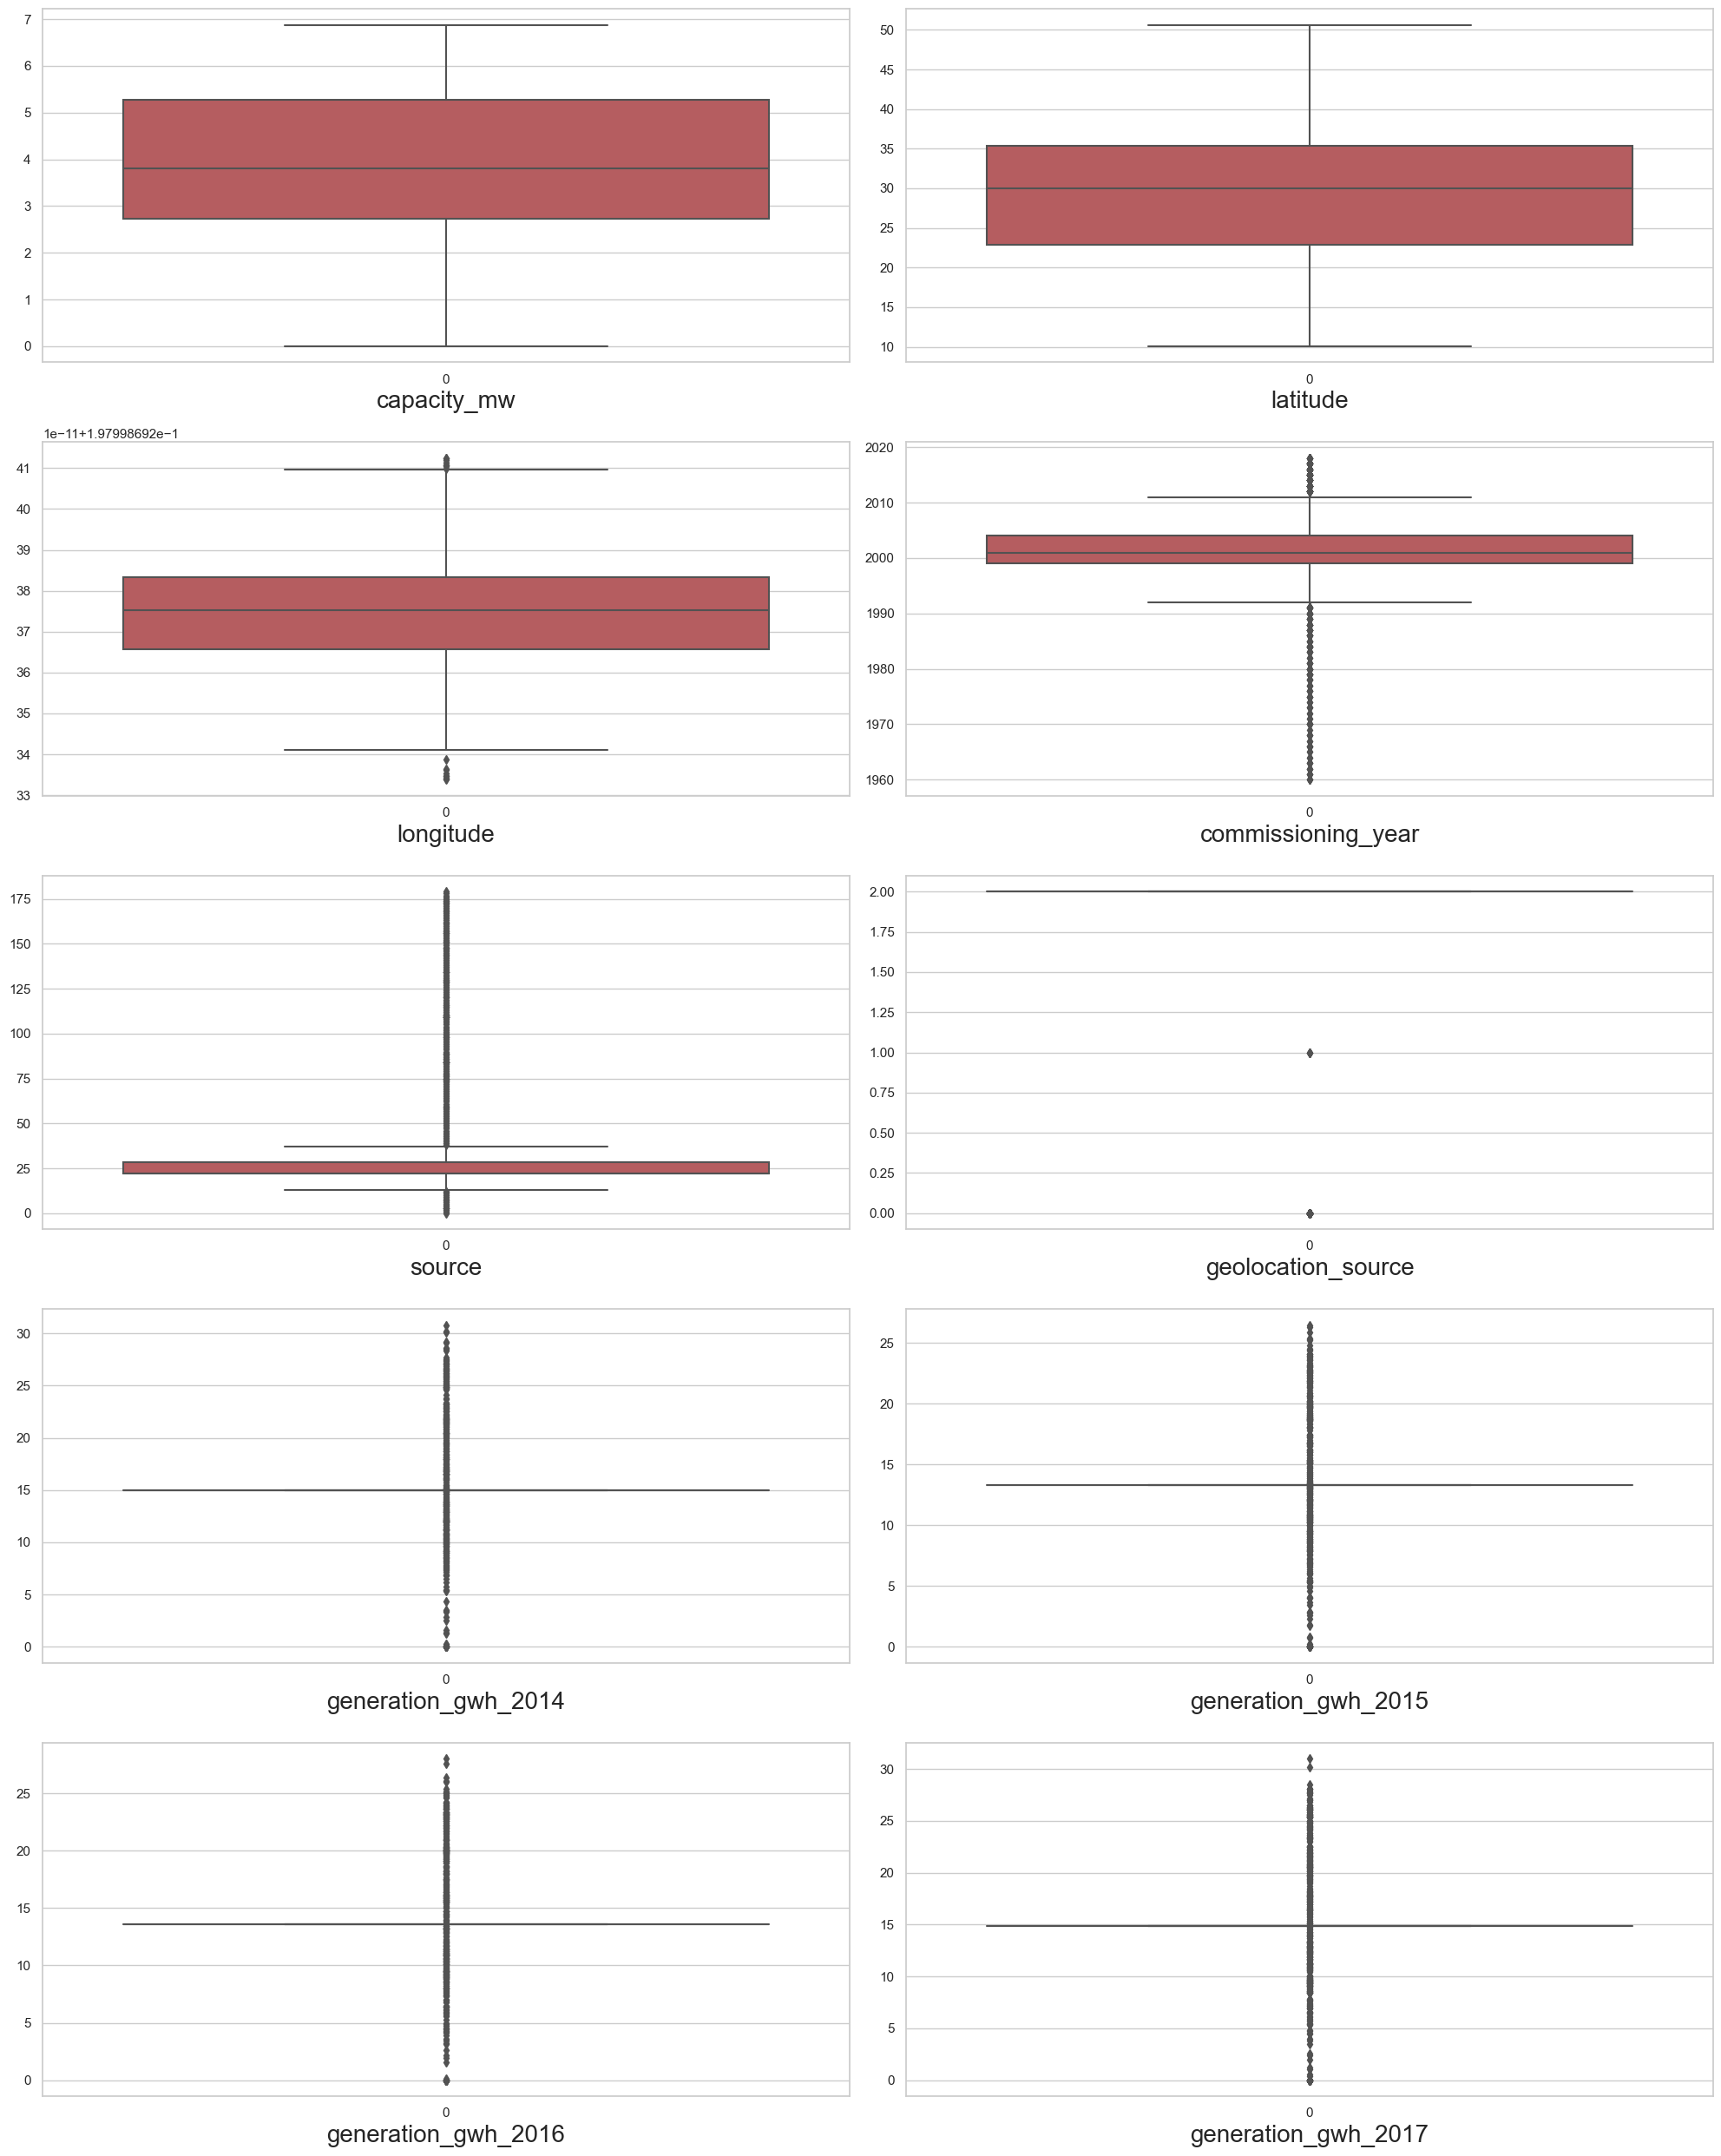

In [59]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot(df[col], color='r')  
        plt.xlabel(col, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

- The data still have outliers but still moving further.

### Correlation map between target variable and independent variables

In [60]:
df.corr()

capacity_mw  latitude  longitude  commissioning_year  \
capacity_mw             1.000000  0.054931   0.332370            0.137341   
latitude                0.054931  1.000000  -0.039568            0.093694   
longitude               0.332370 -0.039568   1.000000            0.048796   
commissioning_year      0.137341  0.093694   0.048796            1.000000   
source                 -0.399933  0.055162  -0.251729            0.076130   
geolocation_source      0.483177 -0.179763   0.301575           -0.051841   
generation_gwh_2014     0.278149  0.094069   0.016057            0.056966   
generation_gwh_2015     0.298059  0.090935   0.017587            0.109329   
generation_gwh_2016     0.323447  0.113227   0.071668            0.184801   
generation_gwh_2017     0.314377  0.090341   0.056108            0.155134   
generation_gwh_2018     0.314377  0.090341   0.056108            0.155134   
primary_fuel           -0.540679 -0.010938  -0.409828           -0.072099   

                       source  geolocation_source  generation_gwh_2014  \
capacity_mw         -0.399933            0.483177             0.278149   
latitude             0.055162           -0.179763             0.094069   
longitude           -0.251729            0.301575             0.016057   
commissioning_year   0.076130           -0.051841             0.056966   
source               1.000000           -0.516283            -0.002638   
geolocation_source  -0.516283            1.000000             0.002145   
generation_gwh_2014 -0.002638            0.002145             1.000000   
generation_gwh_2015 -0.005619            0.004569             0.824718   
generation_gwh_2016 -0.005733            0.004662             0.777903   
generation_gwh_2017 -0.000281            0.000228             0.700797   
generation_gwh_2018 -0.000281            0.000228             0.700797   
primary_fuel         0.061917           -0.473899            -0.123194   

                     generation_gwh_2015  generation_gwh_2016  \
capacity_mw                     0.298059             0.323447   
latitude                        0.090935             0.113227   
longitude                       0.017587             0.071668   
commissioning_year              0.109329             0.184801   
source                         -0.005619            -0.005733   
geolocation_source              0.004569             0.004662   
generation_gwh_2014             0.824718             0.777903   
generation_gwh_2015             1.000000             0.874471   
generation_gwh_2016             0.874471             1.000000   
generation_gwh_2017             0.753986             0.882784   
generation_gwh_2018             0.753986             0.882784   
primary_fuel                   -0.139851            -0.160347   

                     generation_gwh_2017  generation_gwh_2018  primary_fuel  
capacity_mw                     0.314377             0.314377     -0.540679  
latitude                        0.090341             0.090341     -0.010938  
longitude                       0.056108             0.056108     -0.409828  
commissioning_year              0.155134             0.155134     -0.072099  
source                         -0.000281            -0.000281      0.061917  
geolocation_source              0.000228             0.000228     -0.473899  
generation_gwh_2014             0.700797             0.700797     -0.123194  
generation_gwh_2015             0.753986             0.753986     -0.139851  
generation_gwh_2016             0.882784             0.882784     -0.160347  
generation_gwh_2017             1.000000             1.000000     -0.142895  
generation_gwh_2018             1.000000             1.000000     -0.142895  
primary_fuel                   -0.142895            -0.142895      1.000000

- Strong positive correlations are observed between capacity_mw and generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 (ranging from 0.7 to 1.0). geolocation_source and source (0.48).
- Strong negative correlations exist between primary_fuel and capacity_mw, source, geolocation_source (-0.54).
- Moderate negative correlation between commissioning_year and source (-0.4).
- Features generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, and generation_gwh_2018 are highly correlated with each other (correlation coefficient close to 1).

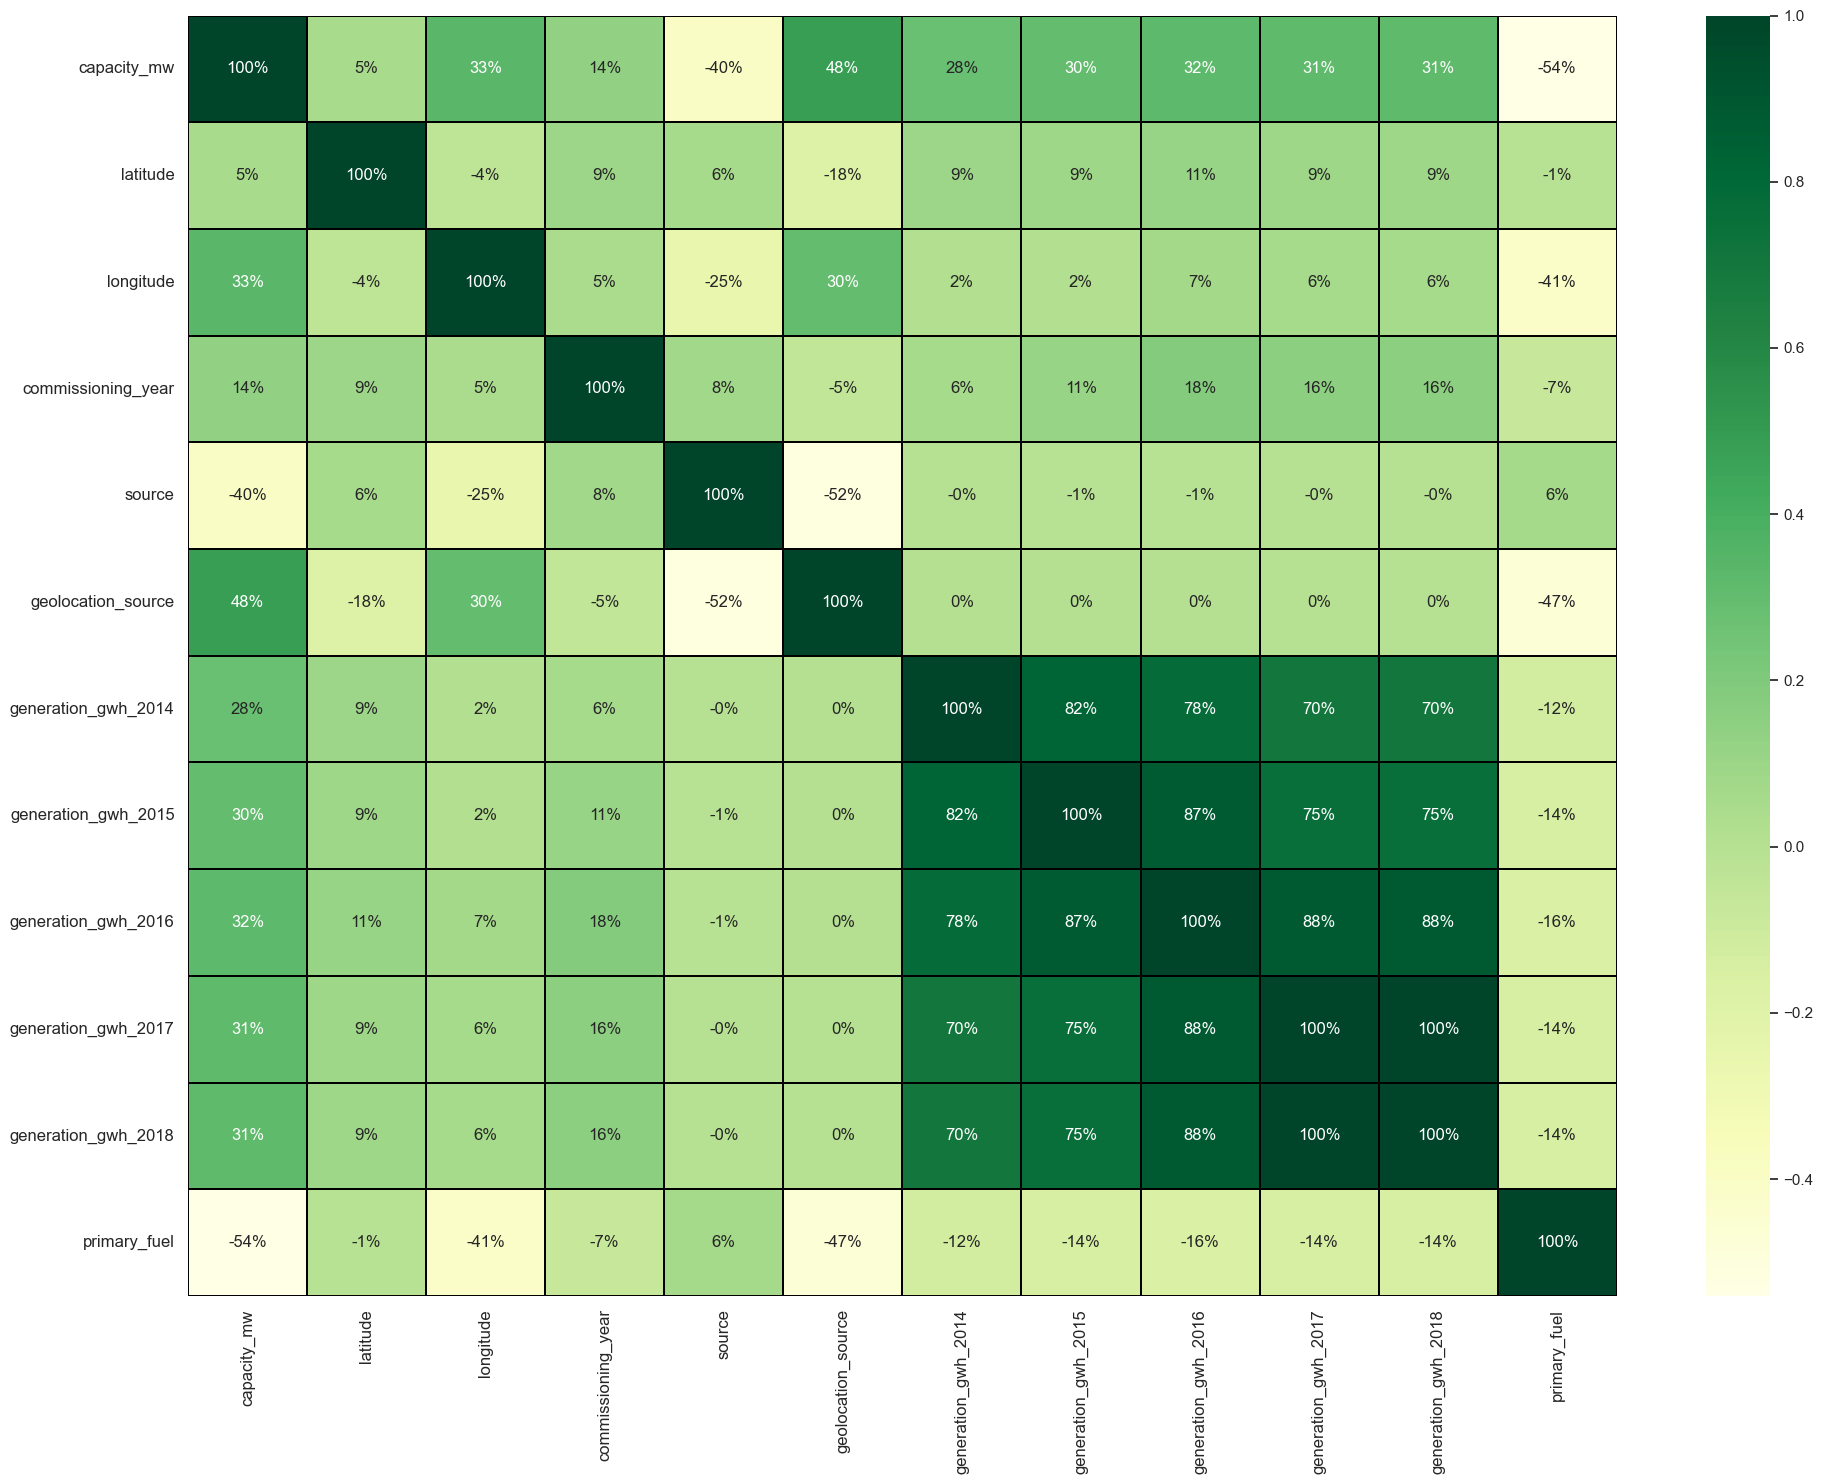

In [61]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt = '0.0%', linecolor ='black', annot = True, cmap = 'YlGn',annot_kws={'size' : 12})
plt.yticks(rotation=0,fontsize=12)
plt.xticks(fontsize=12)
plt.show()

- The data reveals strong positive correlations between electricity generation capacity and the actual generation across multiple years.
- Additionally, there is a notable negative correlation between the primary fuel type and various aspects of the power plants, indicating a potential influence of the fuel type on capacity and source characteristics.

In [62]:
df_capacity_mw = df.copy()

- A new DataFrame named df_capacity_mw has been created as a copy of the original DataFrame df for further regression analysis

In [63]:
df.corr()['primary_fuel'].sort_values(ascending = False)

primary_fuel           1.000000
source                 0.061917
latitude              -0.010938
commissioning_year    -0.072099
generation_gwh_2014   -0.123194
generation_gwh_2015   -0.139851
generation_gwh_2017   -0.142895
generation_gwh_2018   -0.142895
generation_gwh_2016   -0.160347
longitude             -0.409828
geolocation_source    -0.473899
capacity_mw           -0.540679
Name: primary_fuel, dtype: float64

- Negative Correlation with Capacity_mw: Primary_fuel has a moderate negative correlation with capacity_mw (-0.540679). This suggests that the type of primary fuel used in power plants is inversely related to their capacity.
- Strong Negative Correlations: Longitude has a strong negative correlation with both geolocation_source (-0.409828) and capacity_mw (-0.540679). This indicates a significant association between the geographic location (longitude) and the source of geolocation information, as well as the capacity of power plants.
- Moderate Negative Correlations: Geolocation_source shows a moderate negative correlation with both capacity_mw (-0.473899) and primary_fuel (-0.473899). This suggests a moderate relationship between the source of geolocation information and the capacity or primary fuel type of power plants.
- Weak to Negligible Correlations:Other features such as source, latitude, commissioning_year, and generation_gwh variables have weak to negligible correlations with primary_fuel.

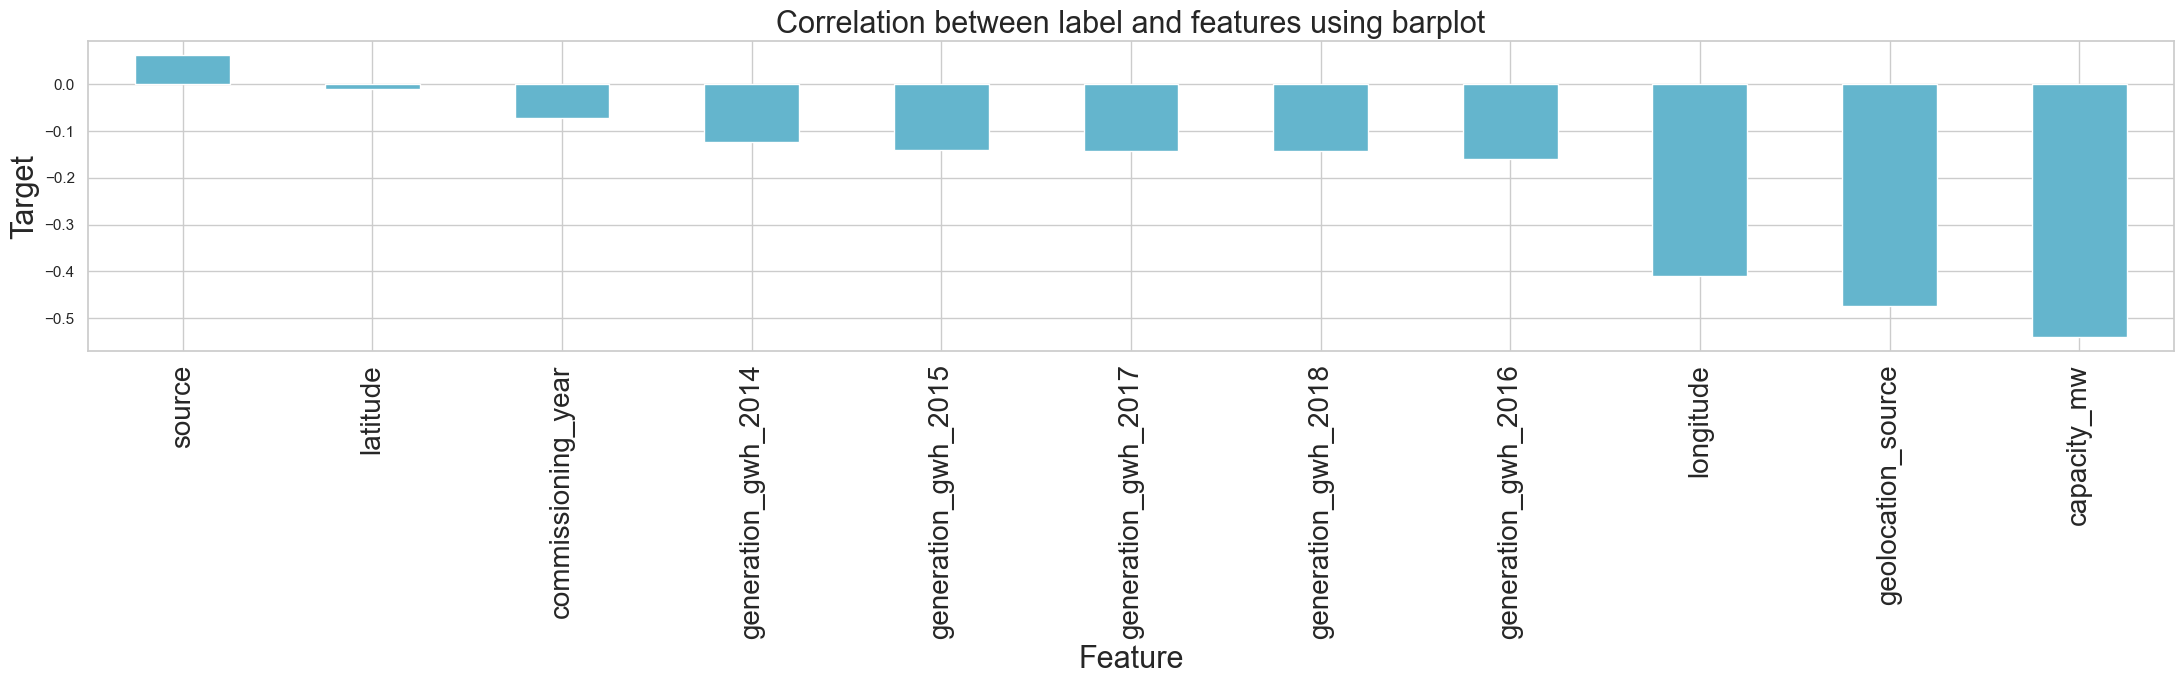

In [64]:
plt.figure(figsize = (22,7))
df.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize = 22)
plt.xticks(fontsize=20)
plt.ylabel('Target',fontsize = 22)
plt.title('Correlation between label and features using barplot',fontsize = 22)
plt.show()

- Source has weak positive correlation with target
- All other variables has negative correlation with target

### Classifier- Prediction for primary_fuel

##### Separating features from target variable

In [65]:
x=df.drop(columns=['primary_fuel'],axis=1)
y=df['primary_fuel']

### Standardization of the data

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

capacity_mw  latitude  longitude  commissioning_year    source  \
0      -1.711253  1.159955  -0.931559            1.006122  1.574647   
1       0.204320  0.576969  -0.520241            0.112530  3.115689   
2      -0.288428  0.096871  -2.379781            0.112530 -0.511687   
3       0.373936  0.426001   2.187317            0.380608 -0.487978   
4       1.680248  0.106270   1.144034            1.363558 -0.487978   
..           ...       ...        ...                 ...       ...   
855     1.623481 -0.818779   0.182030            1.452917 -0.487978   
856    -1.629954 -1.354858   0.361647            0.112530  0.815980   
857    -0.522049 -0.981075  -0.254256            0.112530 -0.511687   
858     0.096065  0.506663  -0.773822            0.112530  0.389230   
859    -0.758388 -1.806509   0.209398            0.112530 -0.511687   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0             -1.074209            -0.005405            -0.011514   
1              0.396842            -0.005405            -0.011514   
2              0.396842            -0.005405            -0.011514   
3              0.396842            -0.219161             0.123485   
4              0.396842             1.300572             2.025651   
..                  ...                  ...                  ...   
855            0.396842            -0.005405            -2.737105   
856           -2.545260            -0.005405            -0.011514   
857            0.396842            -0.005405            -0.011514   
858            0.396842            -0.005405            -0.011514   
859            0.396842            -0.005405            -0.011514   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0              -0.011749            -0.000575            -0.000575  
1              -0.011749            -0.000575            -0.000575  
2              -0.011749            -0.000575            -0.000575  
3               0.131805            -0.157789            -0.157789  
4               2.025482             1.784524             1.784524  
..                   ...                  ...                  ...  
855            -0.799660             0.043056             0.043056  
856            -0.011749            -0.000575            -0.000575  
857            -0.011749            -0.000575            -0.000575  
858            -0.011749            -0.000575            -0.000575  
859            -0.011749            -0.000575            -0.000575  

[860 rows x 11 columns]

### Check Multicollinearity issue

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features'] =x.columns

vif

vif values             Features
0     1.727762          capacity_mw
1     1.072058             latitude
2     1.182513            longitude
3     1.096542   commissioning_year
4     1.451891               source
5     1.695107   geolocation_source
6     3.342283  generation_gwh_2014
7     5.619854  generation_gwh_2015
8     8.743759  generation_gwh_2016
9          inf  generation_gwh_2017
10         inf  generation_gwh_2018

- Inf VIF values for generation_gwh_2017 shows redundant information, indicating potential issues with multicollinearity

In [68]:
x.drop(columns = ['generation_gwh_2017'],axis = 1, inplace=True)

- To avoid overlapping while predicting the target variable, lets drop the column generation_gwh_2017

### Reassuring multicollinearity isssue

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features'] =x.columns

vif

vif values             Features
0    1.727762          capacity_mw
1    1.072058             latitude
2    1.182513            longitude
3    1.096542   commissioning_year
4    1.451891               source
5    1.695107   geolocation_source
6    3.342283  generation_gwh_2014
7    5.619854  generation_gwh_2015
8    8.743759  generation_gwh_2016
9    4.651980  generation_gwh_2018

- No multicollinearity issue is seen among independent variables

### Modelling

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [71]:
maxAccu = 0
maxRs = 0                       
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is ', maxAccu, 'at random_state', maxRS)

Best accuracy is  0.9127906976744186 at random_state 60


In [72]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.30, random_state=maxRS)

In [73]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

### Random Forest Classifier

In [74]:
RFC = RandomForestClassifier()                    
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8914728682170543
[[12  2  0  0  0  0  0  0]
 [ 0 58  2  3  0  1  0  0]
 [ 0  2  5  7  0  0  0  0]
 [ 0  3  0 72  0  1  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  3  0  0  2  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 48]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.84      0.91      0.87        64
           2       0.50      0.36      0.42        14
           3       0.88      0.95      0.91        76
           4       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         6
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        48

    accuracy                           0.89       258
   macro avg       0.71      0.68      0.69       258
weighted avg       0.87      0.89      0.88       258



### LogisticRegression

In [75]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.6937984496124031
[[11  1  0  0  0  0  0  2]
 [ 2 49  4  8  0  0  0  1]
 [ 0 11  0  2  0  1  0  0]
 [ 0 14  1 55  0  0  0  6]
 [ 0  3  0  0  0  0  0  0]
 [ 1  1  2  1  0  0  0  1]
 [ 0  1  0  0  0  0 32  0]
 [ 0  2  0 14  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.60      0.77      0.67        64
           2       0.00      0.00      0.00        14
           3       0.69      0.72      0.71        76
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       1.00      0.97      0.98        33
           7       0.76      0.67      0.71        48

    accuracy                           0.69       258
   macro avg       0.48      0.49      0.48       258
weighted avg       0.66      0.69      0.68       258



### KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier()                    
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8255813953488372
[[13  1  0  0  0  0  0  0]
 [ 1 56  3  2  0  0  0  2]
 [ 0  4  3  6  0  0  0  1]
 [ 1  6  2 60  0  0  0  7]
 [ 0  2  1  0  0  0  0  0]
 [ 0  2  3  0  0  0  0  1]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 48]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.79      0.88      0.83        64
           2       0.25      0.21      0.23        14
           3       0.88      0.79      0.83        76
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00        33
           7       0.81      1.00      0.90        48

    accuracy                           0.83       258
   macro avg       0.58      0.60      0.59       258
weighted avg       0.80      0.83      0.81       258



### GradientBoostingClassifier

In [77]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8875968992248062
[[11  2  0  0  0  1  0  0]
 [ 1 56  4  3  0  0  0  0]
 [ 0  2  7  5  0  0  0  0]
 [ 0  3  0 73  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  3  1  0  1  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 48]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.84      0.88      0.85        64
           2       0.50      0.50      0.50        14
           3       0.89      0.96      0.92        76
           4       0.00      0.00      0.00         3
           5       0.50      0.17      0.25         6
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        48

    accuracy                           0.89       258
   macro avg       0.71      0.66      0.67       258
weighted avg       0.87      0.89      0.88       258



### AdaBoostClassifier

In [78]:
ABC = AdaBoostClassifier()
ABC .fit(x_train,y_train)
predABC  = ABC .predict(x_test)
print(accuracy_score(y_test,predABC ))
print(confusion_matrix(y_test,predABC ))
print(classification_report(y_test,predABC ))

0.6627906976744186
[[ 0 14  0  0  0  0  0  0]
 [ 0 15  0 46  0  0  0  3]
 [ 0  2  0 12  0  0  0  0]
 [ 0  0  0 76  0  0  0  0]
 [ 0  1  0  2  0  0  0  0]
 [ 0  2  0  3  0  0  0  1]
 [ 0  1  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 48]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.43      0.23      0.30        64
           2       0.00      0.00      0.00        14
           3       0.55      1.00      0.71        76
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       1.00      0.97      0.98        33
           7       0.92      1.00      0.96        48

    accuracy                           0.66       258
   macro avg       0.36      0.40      0.37       258
weighted avg       0.57      0.66      0.59       258



### BaggingClassifier

In [79]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8565891472868217
[[12  2  0  0  0  0  0  0]
 [ 2 55  4  3  0  0  0  0]
 [ 0  2  6  6  0  0  0  0]
 [ 0  4  4 67  0  1  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  2  2  1  0  1  0  0]
 [ 0  1  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 48]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.80      0.86      0.83        64
           2       0.38      0.43      0.40        14
           3       0.87      0.88      0.88        76
           4       0.00      0.00      0.00         3
           5       0.50      0.17      0.25         6
           6       1.00      0.97      0.98        33
           7       1.00      1.00      1.00        48

    accuracy                           0.86       258
   macro avg       0.67      0.65      0.65       258
weighted avg       0.85      0.86      0.85       258



### SupportVectorclassifier

In [80]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7829457364341085
[[10  2  0  0  0  0  0  2]
 [ 1 54  2  5  0  0  0  2]
 [ 0  5  1  7  0  0  0  1]
 [ 0  7  0 60  0  0  0  9]
 [ 0  2  1  0  0  0  0  0]
 [ 1  2  1  1  0  0  0  1]
 [ 0  1  0  0  0  0 32  0]
 [ 0  3  0  0  0  0  0 45]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.71      0.84      0.77        64
           2       0.20      0.07      0.11        14
           3       0.82      0.79      0.81        76
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       1.00      0.97      0.98        33
           7       0.75      0.94      0.83        48

    accuracy                           0.78       258
   macro avg       0.54      0.54      0.53       258
weighted avg       0.74      0.78      0.76       258



### ExtraTreesClassifier

In [81]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8682170542635659
[[12  2  0  0  0  0  0  0]
 [ 0 57  1  4  0  1  0  1]
 [ 0  3  3  7  0  1  0  0]
 [ 0  5  0 69  0  0  0  2]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  3  0  0  2  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 48]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.80      0.89      0.84        64
           2       0.43      0.21      0.29        14
           3       0.86      0.91      0.88        76
           4       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         6
           6       1.00      1.00      1.00        33
           7       0.94      1.00      0.97        48

    accuracy                           0.87       258
   macro avg       0.69      0.65      0.66       258
weighted avg       0.85      0.87      0.85       258



### Cross Validation Score

In [82]:
from sklearn.model_selection import cross_val_score

### RandomForestClassifier

In [83]:
score1 = cross_val_score(RFC,x,y)
print(score1)
print('RFC score:',score1.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predRFC)-score1.mean())

[0.83139535 0.86627907 0.87790698 0.83139535 0.84883721]
RFC score: 0.8511627906976743
Difference between Accuracy score and cross validation is:  0.04031007751937998


### LogisticRegression

In [84]:
score2 = cross_val_score(LR,x,y)
print(score2)
print('LR score:',score2.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predLR)-score2.mean())

[0.6627907  0.74418605 0.6627907  0.69767442 0.69186047]
LR score: 0.691860465116279
Difference between Accuracy score and cross validation is:  0.0019379844961241455


### KNeighborsClassifier

In [85]:
score3 = cross_val_score(knn,x,y)
print(score3)
print('knn score:',score3.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predknn)-score3.mean())

[0.76744186 0.79069767 0.77325581 0.80232558 0.80813953]
knn score: 0.7883720930232558
Difference between Accuracy score and cross validation is:  0.037209302325581395


### GradientBoostClassifier

In [86]:
score4 = cross_val_score(GB,x,y)
print(score4)
print('GB score:',score4.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predGB)-score4.mean())

[0.84883721 0.86627907 0.87209302 0.8255814  0.85465116]
GB score: 0.8534883720930232
Difference between Accuracy score and cross validation is:  0.03410852713178303


### AdaBoostClassifier

In [87]:
score5 = cross_val_score(ABC,x,y)
print(score5)
print('ABC score:',score5.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predABC)-score5.mean())

[0.62790698 0.61627907 0.61046512 0.44767442 0.59883721]
ABC score: 0.5802325581395349
Difference between Accuracy score and cross validation is:  0.08255813953488367


### BaggingClassifier

In [88]:
score6 = cross_val_score(BC,x,y)
print(score6)
print('BC score:',score6.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predBC)-score6.mean())

[0.8372093  0.84883721 0.84302326 0.80813953 0.87209302]
BC score: 0.8418604651162791
Difference between Accuracy score and cross validation is:  0.014728682170542573


### Support Vector Machine Classifier

In [89]:
score7 = cross_val_score(svc,x,y)
print(score7)
print('svc score:',score7.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predsvc)-score7.mean())

[0.74418605 0.80232558 0.72093023 0.78488372 0.79069767]
svc score: 0.7686046511627908
Difference between Accuracy score and cross validation is:  0.014341085271317722


### ExtraTreesClassifier

In [90]:
score8 = cross_val_score(ET,x,y)
print(score8)
print('ET score:',score8.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predET)-score8.mean())

[0.83139535 0.86046512 0.86627907 0.8372093  0.86627907]
ET score: 0.8523255813953489
Difference between Accuracy score and cross validation is:  0.015891472868217016


### Compare accuracy of models

In [91]:
pd.DataFrame([['Support Vector Machine',score7.mean()*100],['Extra Tree Classifier',score8.mean()*100],['Gradient Boost Classifier',score4.mean()*100],
              ['LogisticRegression',score2.mean()*100],['Random Forest Classifier',score1.mean()*100],['KNeighborsClassifier',score3.mean()*100],['AdaBoostClassifier',score5.mean()*100],
              ['Bagging Classifier',score6.mean()*100]],columns=['Models','Accuracy'])

Models   Accuracy
0     Support Vector Machine  76.860465
1      Extra Tree Classifier  85.232558
2  Gradient Boost Classifier  85.348837
3         LogisticRegression  69.186047
4   Random Forest Classifier  85.116279
5       KNeighborsClassifier  78.837209
6         AdaBoostClassifier  58.023256
7         Bagging Classifier  84.186047

**The model selected is RandomForestClassifier**
- Accuracy score : 89.1%
- cross_val_score: 85.11%
- Difference between Accuracy score and cross validation is: 0.04

### Hyperparameter Tuning

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
# RandomForestClassifier

params = {'n_estimators':[13,15,17,19,21],             
          'criterion':['entropy','gini'],
          'max_depth':[10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6],
          'n_jobs': [-2,-1,1],
          'random_state':[10,50,1000]}

In [94]:
GCV = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15, 17, 19, 21],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [95]:
print('best params :', GCV.best_params_) 

best params : {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 13, 'n_jobs': -2, 'random_state': 50}


In [96]:
Final_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 88.37%


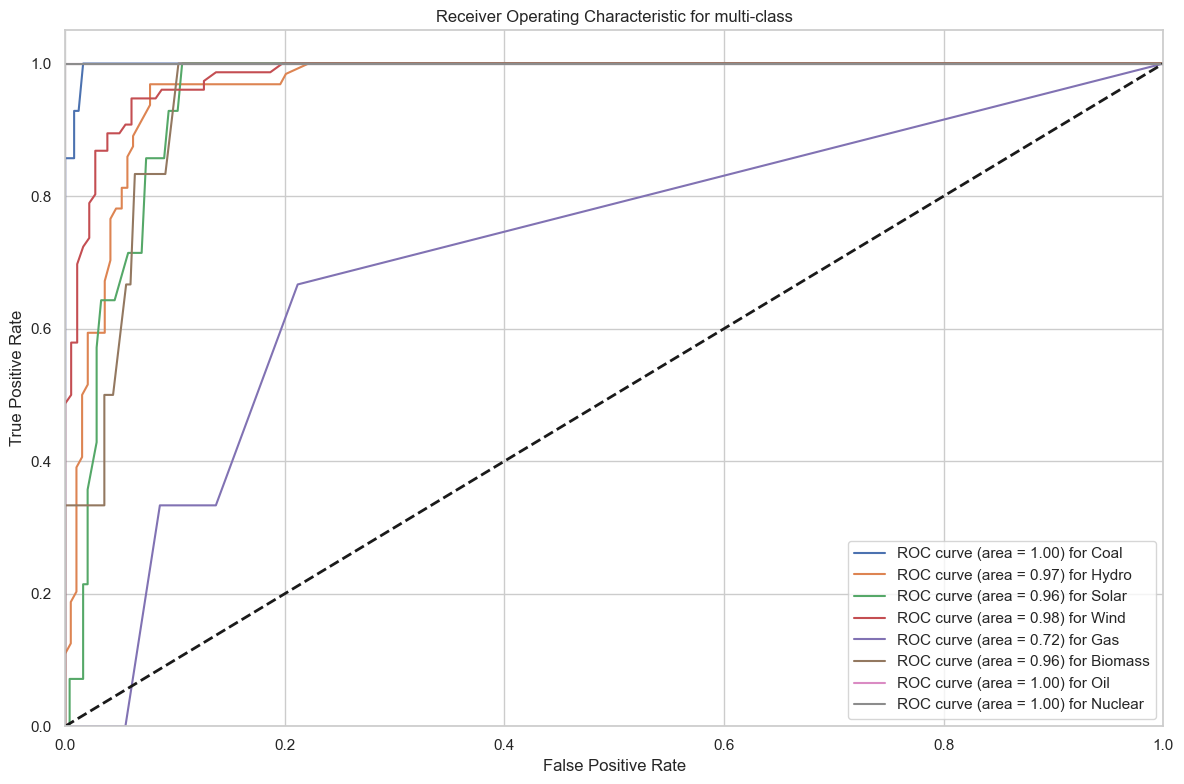

In [98]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test is your true labels for the 8 regions, and Final_model is your trained classifier

y_test_bin = label_binarize(y_test, classes=range(8))

predicted_probabilities = Final_model.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Dictionary mapping subcategory index to names
subcategory_names = {
    0: 'Coal',
    1: 'Hydro',
    2: 'Solar',
    3: 'Wind',
    4: 'Gas',
    5: 'Biomass',
    6: 'Oil',
    7: 'Nuclear'
}

n_classes = y_test_bin.shape[1]

plt.figure(figsize=(12, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:0.2f}) for {subcategory_names[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()


In [99]:
import pickle
with open('Global_Powerplant_India_Analysis.pkl', 'wb') as file:
    pickle.dump(Final_model, file)

In [100]:
with open('Global_Powerplant_India_Analysis.pkl', 'rb') as file:
    model = pickle.load(file)
    result = model.score(x_test,y_test)
    print(result*100)

88.37209302325581


In [101]:
rfc=np.array(y_test)
df = pd.DataFrame()
df['Predicted'] =pred
df['Actual'] = rfc
df

Predicted  Actual
0            3       3
1            2       2
2            7       7
3            1       1
4            3       3
..         ...     ...
253          3       2
254          1       3
255          2       1
256          3       3
257          7       7

[258 rows x 2 columns]

# Regression Model

In [102]:
df = df_capacity_mw

In [103]:
df.head(3)

capacity_mw   latitude  longitude  commissioning_year  source  \
0     1.223336  40.133918   0.197999                2011     109   
1     4.215362  34.707203   0.197999                2001     174   
2     3.445715  30.238228   0.197999                2001      21   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                   1            14.972642            13.292908   
1                   2            14.972642            13.292908   
2                   2            14.972642            13.292908   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  primary_fuel  
0            13.554365            14.883672            14.883672             6  
1            13.554365            14.883672            14.883672             1  
2            13.554365            14.883672            14.883672             7

In [104]:
print('Minimum Capacity of Powerplant:',df1.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df1.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


- Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW. 
- Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW. 

In [107]:
df.corr()['capacity_mw'].sort_values(ascending = False)

capacity_mw            1.000000
geolocation_source     0.483177
longitude              0.332370
generation_gwh_2016    0.323447
generation_gwh_2017    0.314377
generation_gwh_2018    0.314377
generation_gwh_2015    0.298059
generation_gwh_2014    0.278149
commissioning_year     0.137341
latitude               0.054931
source                -0.399933
primary_fuel          -0.540679
Name: capacity_mw, dtype: float64

**Moderate Positive Correlations (greater than 0.5):**

- Geolocation_source (0.483177): There is a moderate positive correlation between the geolocation source and the power plant capacity. Power plants in certain geographical sources may have higher capacities.

- Longitude (0.332370): There is a moderate positive correlation between longitude and power plant capacity. This suggests that power plants located at certain longitudes may have higher capacities.

- Generation_gwh_2016 (0.323447): There is a moderate positive correlation between electricity generation in 2016 and power plant capacity. Higher capacity plants may produce more electricity.

- Generation_gwh_2017 (0.314377) and Generation_gwh_2018 (0.314377): These two variables show a moderate positive correlation with power plant capacity. Similar to the above point, higher capacity plants may generate more electricity.

- Generation_gwh_2015 (0.298059): There is a moderate positive correlation with electricity generation in 2015 and power plant capacity.

- Generation_gwh_2014 (0.278149): This variable also shows a moderate positive correlation with power plant capacity.

- Commissioning_year (0.137341): There is a weak positive correlation between commissioning year and power plant capacity. It suggests a slight tendency for newer plants to have higher capacities.

**Weak Correlations (between -0.5 and 0.5):**

- Latitude (0.054931): There is a very weak positive correlation between latitude and power plant capacity.

- Source (-0.399933): There is a weak negative correlation between the energy source and power plant capacity. This suggests that certain sources may be associated with lower capacities.

**Strong Negative Correlation (less than -0.5):**

- Primary_fuel (-0.540679): There is a moderate negative correlation between the primary fuel type and power plant capacity. This indicates that certain types of fuels are associated with lower capacities.
- The strongest negative correlation is with the 'primary_fuel' variable, suggesting that the type of fuel used has a significant impact on power plant capacity.

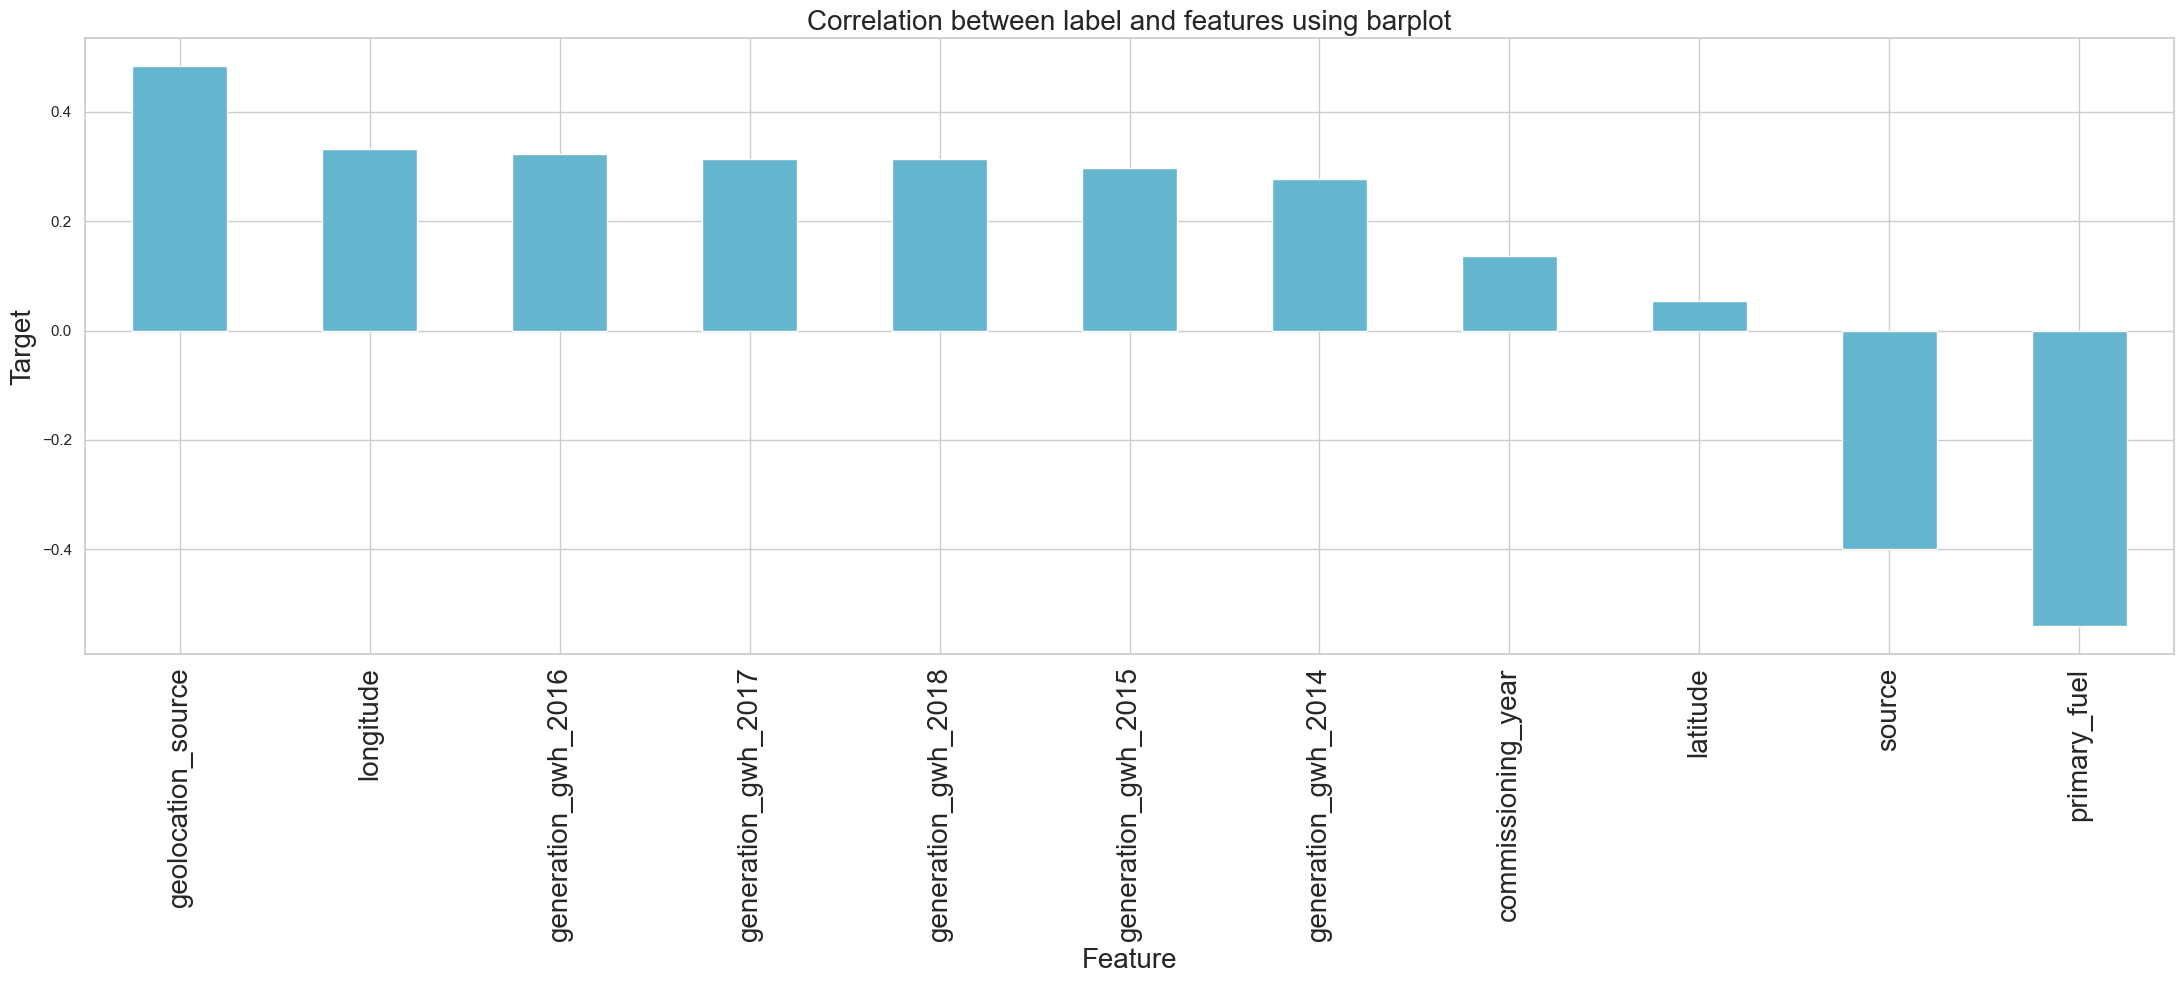

In [108]:
plt.figure(figsize = (22,10))
df.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Target',fontsize = 20)
plt.title('Correlation between label and features using barplot',fontsize = 20)
plt.show()

- The strongest negative correlation is with the 'primary_fuel' variable, suggesting that the type of fuel used has a significant impact on power plant capacity

### Separating features from target variable

In [109]:
x=df.drop(columns=['capacity_mw'],axis=1)
y=df['capacity_mw']

### Standardization of the data

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

latitude  longitude  commissioning_year    source  geolocation_source  \
0    1.159955  -0.931559            1.006122  1.574647           -1.074209   
1    0.576969  -0.520241            0.112530  3.115689            0.396842   
2    0.096871  -2.379781            0.112530 -0.511687            0.396842   
3    0.426001   2.187317            0.380608 -0.487978            0.396842   
4    0.106270   1.144034            1.363558 -0.487978            0.396842   
..        ...        ...                 ...       ...                 ...   
855 -0.818779   0.182030            1.452917 -0.487978            0.396842   
856 -1.354858   0.361647            0.112530  0.815980           -2.545260   
857 -0.981075  -0.254256            0.112530 -0.511687            0.396842   
858  0.506663  -0.773822            0.112530  0.389230            0.396842   
859 -1.806509   0.209398            0.112530 -0.511687            0.396842   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0              -0.005405            -0.011514            -0.011749   
1              -0.005405            -0.011514            -0.011749   
2              -0.005405            -0.011514            -0.011749   
3              -0.219161             0.123485             0.131805   
4               1.300572             2.025651             2.025482   
..                   ...                  ...                  ...   
855            -0.005405            -2.737105            -0.799660   
856            -0.005405            -0.011514            -0.011749   
857            -0.005405            -0.011514            -0.011749   
858            -0.005405            -0.011514            -0.011749   
859            -0.005405            -0.011514            -0.011749   

     generation_gwh_2017  generation_gwh_2018  primary_fuel  
0              -0.000575            -0.000575      1.194177  
1              -0.000575            -0.000575     -0.980733  
2              -0.000575            -0.000575      1.629159  
3              -0.157789            -0.157789     -0.545751  
4               1.784524             1.784524     -0.980733  
..                   ...                  ...           ...  
855             0.043056             0.043056     -0.980733  
856            -0.000575            -0.000575      1.194177  
857            -0.000575            -0.000575      1.629159  
858            -0.000575            -0.000575     -0.980733  
859            -0.000575            -0.000575      1.629159  

[860 rows x 11 columns]

###  Checking for Multicollinearity issue

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features'] =x.columns

vif

vif values             Features
0     1.069235             latitude
1     1.300168            longitude
2     1.076250   commissioning_year
3     1.533679               source
4     1.964938   geolocation_source
5     3.333979  generation_gwh_2014
6     5.612207  generation_gwh_2015
7     8.745091  generation_gwh_2016
8          inf  generation_gwh_2017
9          inf  generation_gwh_2018
10    1.648557         primary_fuel

- Low VIF (1 to 2): Latitude, Longitude, Commissioning_year, Source, and Primary_fuel have relatively low VIF values (ranging from 1.069 to 1.964). These values suggest that these features are not highly correlated with the other variables in the dataset.
- Moderate VIF (2 to 5): Generation_gwh_2014, Generation_gwh_2015, and Generation_gwh_2016 have moderate VIF values (ranging from 3.333 to 5.612). While there is some correlation, it is not severe enough to raise concerns about multicollinearity.
- High VIF (greater than 5): Generation_gwh_2017 and Generation_gwh_2018 have VIF values of infinity (inf), indicating a potentially high level of multicollinearity. This suggests a strong correlation between these two variables and others in the dataset.
- Primary_fuel: Primary_fuel has a moderate VIF value (1.648557), indicating a moderate correlation with other variables in the dataset.

In [112]:
x.drop(columns = ['generation_gwh_2017'],axis = 1, inplace=True)

- Inf VIF values for generation_gwh_2017 shows redundant information, indicating potential issues with multicollinearity
- To avoid overlapping while predicting the target variable, lets drop the column generation_gwh_2017

### Rechecking for Multicollinearity issue

In [113]:
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features'] =x.columns

vif

vif values             Features
0    1.069235             latitude
1    1.300168            longitude
2    1.076250   commissioning_year
3    1.533679               source
4    1.964938   geolocation_source
5    3.333979  generation_gwh_2014
6    5.612207  generation_gwh_2015
7    8.745091  generation_gwh_2016
8    4.610413  generation_gwh_2018
9    1.648557         primary_fuel

- No multicollinearity issue is observed

### Modelling

### Regression - Prediction for capacity_mw

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [115]:
maxAccu = 0
maxRs = 0                       
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Maximum r2score is ', maxAccu, 'on random_state', maxRS)

Maximum r2score is  0.6375435235780089 on random_state 165


In [116]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state=maxRS)

In [117]:
# Checking accuracy for LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score on training data::',r2_score(y_train,pred_train)*100)
print('R2_score on testing data:',r2_score(y_test,pred_LR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score on training data:: 47.47576830386281
R2_score on testing data: 0.6375435235780089
Mean Absolute Error: 0.8115811397560192
Mean Squared Error: 1.0216151760116812
Root Mean Squared Error: 1.0107498088111029


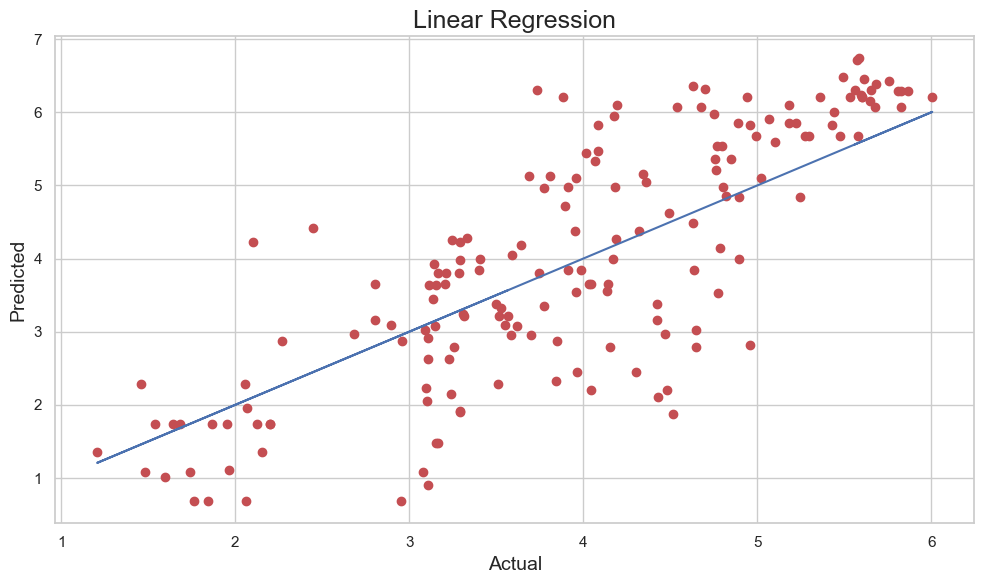

In [118]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_LR, y=y_test, color = 'r')
plt.plot(pred_LR,pred_LR,color = 'b')
plt.xlabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Linear Regression', fontsize = 18)
plt.show()

In [119]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_RFR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score on training data: 96.66777580224968
R2_score on test data: 0.8057260954417507
Mean Absolute Error: 0.5343698066862379
Mean Squared Error: 0.5475779358641653
Root Mean Squared Error: 0.7399850916499368


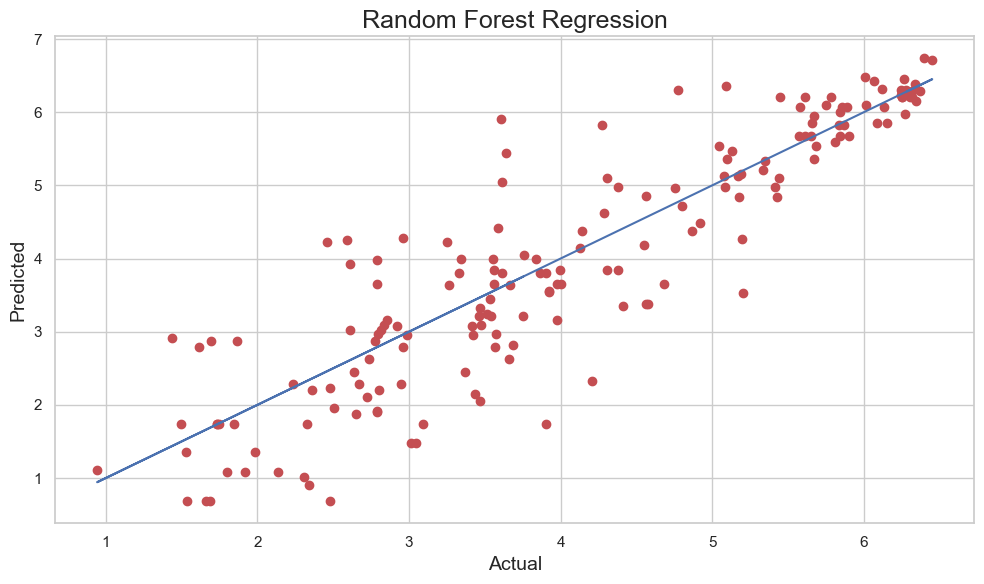

In [120]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_RFR, y=y_test, color = 'r')
plt.plot(pred_RFR,pred_RFR,color = 'b')
plt.xlabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Random Forest Regression', fontsize = 18)
plt.show()

In [121]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_knn))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score on training data: 79.07601199337404
R2_score on test data: 0.7414564446748704
Mean Absolute Error: 0.6379284642787594
Mean Squared Error: 0.7287275492703614
Root Mean Squared Error: 0.853655404288148


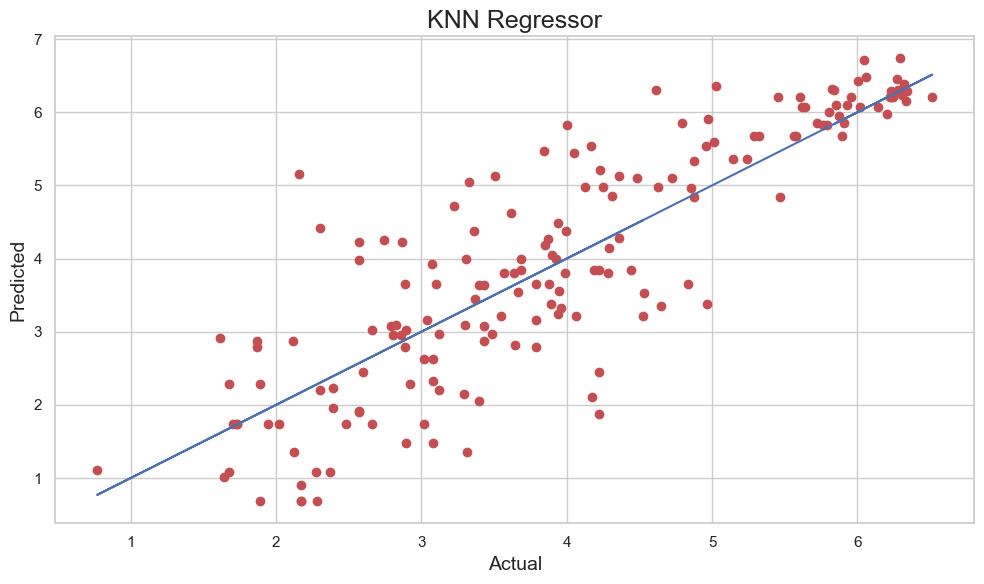

In [122]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_knn, y=y_test, color = 'r')
plt.plot(pred_knn,pred_knn,color = 'b')
plt.xlabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('KNN Regressor', fontsize = 18)
plt.show()

In [123]:
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_GBR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score on training data: 88.59689372431636
R2_score on test data: 0.8177924091567383
Mean Absolute Error: 0.524813427691285
Mean Squared Error: 0.5135679787751456
Root Mean Squared Error: 0.7166365737074445


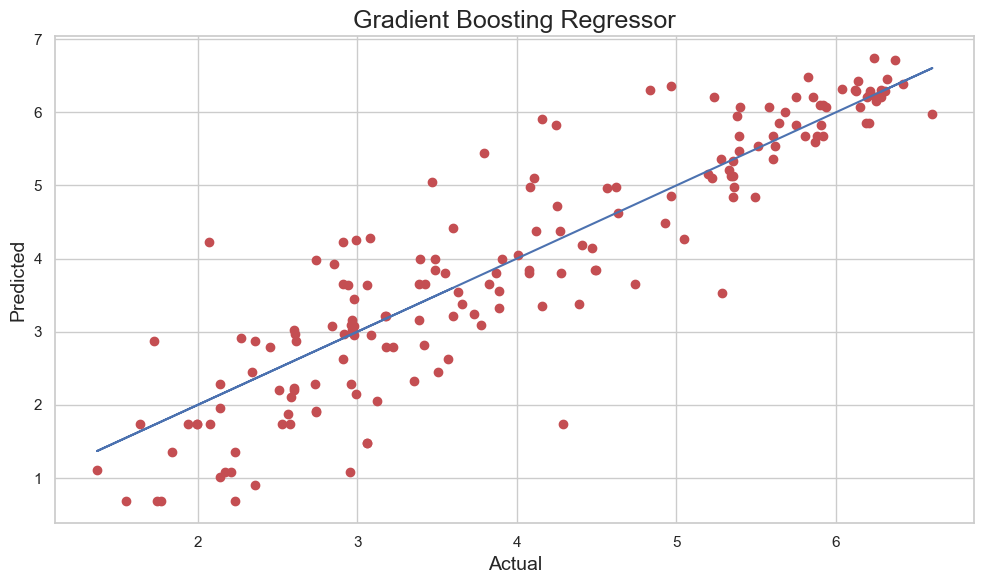

In [124]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_GBR, y=y_test, color = 'r')
plt.plot(pred_GBR,pred_GBR,color = 'b')
plt.xlabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Gradient Boosting Regressor', fontsize = 18)
plt.show()

In [125]:
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_svr))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score on training data: 73.06738215046842
R2_score on test data: 0.7409867854637286
Mean Absolute Error: 0.6284994889390358
Mean Squared Error: 0.7300513246996008
Root Mean Squared Error: 0.8544304095124429


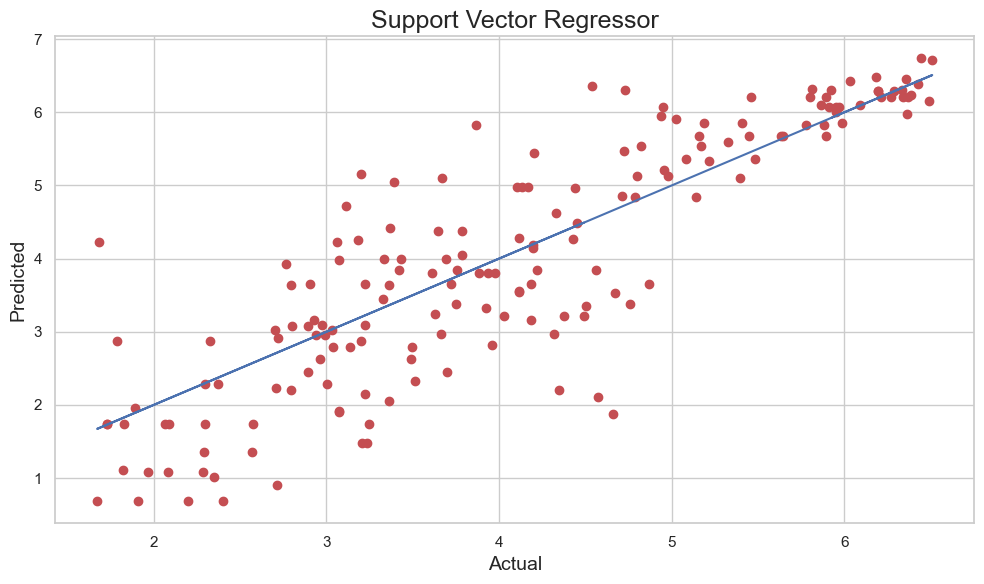

In [126]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_svr, y=y_test, color = 'r')
plt.plot(pred_svr,pred_svr,color = 'b')
plt.xlabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Support Vector Regressor', fontsize = 18)
plt.show()

In [127]:
ETR = ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_ETR = ETR.predict(x_test)
pred_train = ETR.predict(x_train)
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_ETR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ETR)))

R2_score on training data: 99.29777982302122
R2_score on test data: 0.8276337973487455
Mean Absolute Error: 0.5078084368962191
Mean Squared Error: 0.48582916823097616
Root Mean Squared Error: 0.6970144677343334


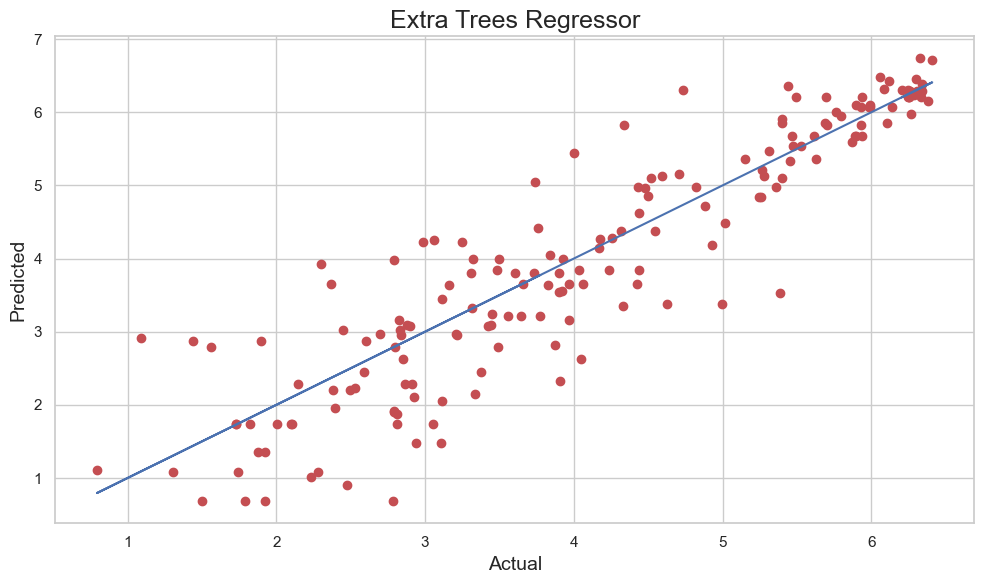

In [128]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_ETR, y=y_test, color = 'r')
plt.plot(pred_ETR,pred_ETR,color = 'b')
plt.xlabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Extra Trees Regressor', fontsize = 18)
plt.show()

### Cross Validation Score

In [129]:
from sklearn.model_selection import cross_val_score

### Random Forest Regressor

In [130]:
score1 = cross_val_score(RFR,x,y)
print(score1)
print('RFR score:',score1.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.76123248 0.75295046 0.78384115 0.83708494 0.77810643]
RFR score: 0.7826430911646108
Difference between R2 score and cross validation is:  2.308300427713983


### KNeighborsRegressor

In [131]:
score2 = cross_val_score(knn,x,y)
print(score2)
print('KNN score:',score2.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.67770939 0.64691291 0.6467356  0.72520261 0.69334307]
KNN score: 0.6779807154000022
Difference between R2 score and cross validation is:  6.347572927486822


### GradientBoosingRegressor

In [132]:
score3 = cross_val_score(GBR,x,y)
print(score3)
print('GBR score:',score3.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_GBR)-score3.mean())*100)

[0.78681397 0.77405639 0.79035328 0.83173884 0.78719253]
GBR score: 0.7940310020051139
Difference between R2 score and cross validation is:  2.3761407151624447


### SupportVectorRegressor

In [133]:
score4 = cross_val_score(svr,x,y)
print(score4)
print('SVR score:',score4.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_svr)-score4.mean())*100)

[0.71662017 0.65836097 0.70570666 0.71981967 0.64837348]
SVR score: 0.6897761899573067
Difference between R2 score and cross validation is:  5.121059550642193


### ExtraTreesRegressor

In [134]:
score5 = cross_val_score(ETR,x,y)
print(score5)
print('ETR score:',score5.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_svr)-score5.mean())*100)

[0.76526023 0.74182809 0.7924331  0.82703838 0.78672095]
ETR score: 0.7826561500060392
Difference between R2 score and cross validation is:  -4.166936454231052


### LinearRegression

In [135]:
score6 = cross_val_score(LR,x,y)
print(score6)
print('LR score:',score6.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_LR)-score6.mean())*100)

[0.50604421 0.49504293 0.46899605 0.5052873  0.50734232]
LR score: 0.49654256380923983
Difference between R2 score and cross validation is:  14.100095976876908


### Compare accuracy of models

In [136]:
pd.DataFrame([['Support Vector Regressor',score4.mean()*100],['Extra Trees Regressor',score5.mean()*100],
              ['Gradient Boosting Regressor',score3.mean()*100],['Random Forest Regressor',score1.mean()*100],
              ['KNeighborsClassifier',score2.mean()*100],
              ['Linear Regression',score6.mean()*100]],columns=['Models','Accuracy'])

Models   Accuracy
0     Support Vector Regressor  68.977619
1        Extra Trees Regressor  78.265615
2  Gradient Boosting Regressor  79.403100
3      Random Forest Regressor  78.264309
4         KNeighborsClassifier  67.798072
5            Linear Regression  49.654256

**The model selected is GradientBoostingRegressor:**
- cross_val_score is 79.40
- Difference between R2 score and cross validation is:  2.37
- R2_score on training data: 96.66777580224968
- R2_score on test data: 0.8057260954417507
- Mean Absolute Error: 0.5343698066862379
- Mean Squared Error: 0.5475779358641653
- Root Mean Squared Error: 0.7399850916499368

### Hyperparameter Tuning

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
grid_param = {'max_depth': range(4,8),           
              'min_samples_split':range(2,8,2),
              'learning_rate': np.arange(0.1,0.3)}

grid = GridSearchCV(GradientBoostingRegressor(),param_grid=grid_param)
grid.fit(x_train,y_train) 

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [139]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2}

In [140]:
Model = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 7, min_samples_split= 2,ccp_alpha=0.0, criterion='friedman_mse',
                                  max_features=None,max_leaf_nodes=8,min_impurity_decrease=0.0,min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,random_state=169)

In [141]:
Model.fit(x_train,y_train)
pred = Model.predict(x_test)

print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.8249851883764263
Mean Absolute Error: 0.5051322396635461
Mean Squared Error: 0.49329450351247844
Root Mean Squared Error: 0.7023492745867105


In [142]:
import pickle
filename = 'Global_Powerplant_Classifier_Analysis.pkl'
pickle.dump(Model,open(filename,'wb')) 

In [143]:
import pickle
loaded_model = pickle.load(open('Global_Powerplant_Classifier_Analysis.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

82.49851883764264


In [144]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

0         1         2         3         4         5    \
Predicted  3.837807  2.932237  5.884773  4.416897  2.859496  3.274073   
Original   3.218831  3.097304  5.678354  3.846126  3.080811  2.817607   

                6         7         8         9    ...       162       163  \
Predicted  5.464205  6.229241  4.229541  4.615901  ...  3.425144  2.458563   
Original   5.678354  6.213798  5.102064  4.628695  ...  2.332158  2.204475   

                164       165       166       167       168       169  \
Predicted  2.329141  4.133089  1.590895  3.802852  5.244286  2.075167   
Original   2.785289  4.383162  1.731970  3.805115  4.982602  2.915970   

                170       171  
Predicted  5.592213  6.255697  
Original   5.535242  6.303425  

[2 rows x 172 columns]